## Webscraping GoFundMe 

#### Use selenium library to scrape data from GoFundMe in the categories: "Creativity" "Education" "Environment" "NonProfit" "Family" in a local area nearby 

The data that will be extracted includes Campaign title, Category, Current funding amount, and Funding goal. Data scraping is used for learning purposes only and the names of the campaign makers will not be extracted. Once the data is extracted into a Python list, the list will be converted into a Pandas DataFrame for Exploratory Data Analysis (EDA). The main focus is on which category receives the most funding/success on this website depending on user's location.

In [1]:
#import the necessary libraries:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import selenium

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver import ActionChains, Keys
import time

In [128]:
options = Options()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

fundme_campaigns = [] #list to store campaign information

#the url page in question:
url_page = "https://www.gofundme.com/s?location-lat=40.57870&location-lng=-74.22920&location-description=Carteret&c=13&c=17&c=342&c=8&c=4"

options.add_argument("--headless=new")
driver = webdriver.Chrome(options=options)
driver.get(url_page)
wait = WebDriverWait(driver, 30)  # Wait up to 10 seconds for all elements in the website to load

counter = 48 #start at 48 elements, increment it till it hits 1000

for i in range(1000):


    if i == counter:
        
        counter+=48
        time.sleep(5)
        load_more = driver.find_element(By.CSS_SELECTOR, "div.hrt-disp-flex.hrt-justify-center.state-results_buttonWrapper__8XS__")
        load_more.click()
        time.sleep(5)

    else:

        time.sleep(5)
        elements = driver.find_elements(By.CSS_SELECTOR, "div.full-state-list-card_mediaCardImage__edpE8")
        driver.execute_script("arguments[0].scrollIntoView();", elements[i])
        time.sleep(5)
        elements[i].click()
        time.sleep(5)

        #elements to extract
        campaign_title = driver.find_element(By.CSS_SELECTOR, "header.p-campaign-header")
        funds = driver.find_element(By.CSS_SELECTOR, "div.progress-meter_progressMeter__BYOlt")
        #summary = driver.find_element(By.CSS_SELECTOR, "div.campaign-description_campaignDescription__6P_RU")
        category = driver.find_element(By.CSS_SELECTOR, "a.hrt-disp-flex.hrt-align-center.hrt-link.hrt-link--gray-dark")
        date = driver.find_element(By.CSS_SELECTOR, "span.m-campaign-byline-created.a-created-date")

        #append the text found into the fundme_campaigns list
        fundme_campaigns.append([campaign_title.text,funds.text, date.text, category.text])

        #go back to the main page and repeat
        driver.back()
        time.sleep(5)
    
print(fundme_campaigns)
print("Number of elements found: ", len(elements))

driver.close()


ElementClickInterceptedException: Message: element click intercepted: Element <div class="full-state-list-card_mediaCardImage__edpE8" style="background-image: url(&quot;https://d2g8igdw686xgo.cloudfront.net/79675965_1714940265279133_r.png&quot;);"></div> is not clickable at point (496, 659). Other element would receive the click: <div id="transcend-consent-manager" style="position: fixed; z-index: 2147483647;"></div>
  (Session info: chrome=126.0.6478.127)
Stacktrace:
	GetHandleVerifier [0x00007FF7CD2AEEA2+31554]
	(No symbol) [0x00007FF7CD227ED9]
	(No symbol) [0x00007FF7CD0E872A]
	(No symbol) [0x00007FF7CD14012E]
	(No symbol) [0x00007FF7CD13DAF2]
	(No symbol) [0x00007FF7CD13AF8B]
	(No symbol) [0x00007FF7CD13A156]
	(No symbol) [0x00007FF7CD12C151]
	(No symbol) [0x00007FF7CD15D02A]
	(No symbol) [0x00007FF7CD12BA76]
	(No symbol) [0x00007FF7CD15D240]
	(No symbol) [0x00007FF7CD17C977]
	(No symbol) [0x00007FF7CD15CDD3]
	(No symbol) [0x00007FF7CD12A33B]
	(No symbol) [0x00007FF7CD12AED1]
	GetHandleVerifier [0x00007FF7CD5B8B1D+3217341]
	GetHandleVerifier [0x00007FF7CD605AE3+3532675]
	GetHandleVerifier [0x00007FF7CD5FB0E0+3489152]
	GetHandleVerifier [0x00007FF7CD35E776+750614]
	(No symbol) [0x00007FF7CD23375F]
	(No symbol) [0x00007FF7CD22EB14]
	(No symbol) [0x00007FF7CD22ECA2]
	(No symbol) [0x00007FF7CD21E16F]
	BaseThreadInitThunk [0x00007FFDB8BA257D+29]
	RtlUserThreadStart [0x00007FFDBAACAF28+40]


In [129]:
print(len(fundme_campaigns)) #check how many campaigns were scraped

539


In [130]:
print(fundme_campaigns) #checking the list

[["Support Samuel's Family Through Tough Times", '$57,724 raised of $100,000 goal\n884 donations', 'Created June 30th, 2024', 'Family'], ["Support Zahavi Family's Recovery from Fire", '$531,812 raised of $1,000,000 goal\n4.3K donations', 'Created June 30th, 2024', 'Family'], ['Help Asmaa Family in Gaza Food Water And Shelter', '$54,006 raised of $100,000 goal\n2.6K donations', 'Created May 6th, 2024', 'Family'], ['Help Secure a Home for Family Unjustly Evicted', '$25,289 raised of $859,000 goal\n643 donations', 'Created 5 d ago', 'Family'], ['In Memory of Kate: Support for Her Family', '$38,435 raised of $50,000 goal\n311 donations', 'Created 5 d ago', 'Family'], ["Support for Herman's Family in Tragic Loss", '$15,621 raised of $20,000 goal\n204 donations', 'Created 4 d ago', 'Family'], ['Support for Deer Park Nail Spa Family', '$72,721 raised of $100,000 goal\n1.2K donations', 'Created June 29th, 2024', 'Family'], ["Appeal To Help Secure Future for Naveen Turlapati's Children", '$7,83

In [2]:
fundme_campaigns = [["Support Samuel's Family Through Tough Times", '$57,724 raised of $100,000 goal\n884 donations', 'Created June 30th, 2024', 'Family'], ["Support Zahavi Family's Recovery from Fire", '$531,812 raised of $1,000,000 goal\n4.3K donations', 'Created June 30th, 2024', 'Family'], ['Help Asmaa Family in Gaza Food Water And Shelter', '$54,006 raised of $100,000 goal\n2.6K donations', 'Created May 6th, 2024', 'Family'], ['Help Secure a Home for Family Unjustly Evicted', '$25,289 raised of $859,000 goal\n643 donations', 'Created 5 d ago', 'Family'], ['In Memory of Kate: Support for Her Family', '$38,435 raised of $50,000 goal\n311 donations', 'Created 5 d ago', 'Family'], ["Support for Herman's Family in Tragic Loss", '$15,621 raised of $20,000 goal\n204 donations', 'Created 4 d ago', 'Family'], ['Support for Deer Park Nail Spa Family', '$72,721 raised of $100,000 goal\n1.2K donations', 'Created June 29th, 2024', 'Family'], ["Appeal To Help Secure Future for Naveen Turlapati's Children", '$7,839 raised of $150,000 goal\n124 donations', 'Created 1 d ago', 'Family'], ["Help Honor James Cruz's Legacy", '$4,090 raised of $5,000 goal\n87 donations', 'Created 5 d ago', 'Family'], ['Help me evacuate from Gaza', '$2,141 raised of $20,000 goal\n82 donations', 'Created 6 d ago', 'Family'], ["Support Patricia's Children's Future", '$26,030 raised of $10,000 goal\n156 donations', 'Created 7 d ago', 'Family'], ['In Loving Memory of Javier "Cracc" Osorio-Mejía', '$22,745 raised of $35,000 goal\n61 donations', 'Created 4 d ago', 'Family'], ['In Memory of Joan Milan: Support for her Family', '$8,178 raised of $7,500 goal\n58 donations', 'Created 2 d ago', 'Family'], ["Support Mike's Journey to Kidney Recovery", '$22,365 raised of $12,000 goal\n151 donations', 'Created 5 d ago', 'Family'], ['Help Diamond Overcome Tragic Loss', '$5,428 raised of $15,000 goal\n89 donations', 'Created 4 d ago', 'Family'], ['Help Aya’s family to move out of Gaza to Egypt', '$4,400 raised of $48,000 goal\n259 donations', 'Created May 3rd, 2024', 'Family'], ["Help David Nissani's Shana ד tuition in Yeshiva", '$2,689 raised of $10,000 goal\n51 donations', 'Created 2 d ago', 'Education'], ['Family Aid (medical bills, rent etc)', '$3,110 raised of $10,000 goal\n51 donations', 'Created 3 d ago', 'Family'], ["Join Elham's Journey to a New Start", '$13,329 raised of $46,000 goal\n512 donations', 'Created April 16th, 2024', 'Family'], ['Support Diana and her children in their time of need ❤', '$2,920 raised of $15,000 goal\n43 donations', 'Created 2 d ago', 'Family'], ['Help Massiah Find a Safe Home', '$61,978 raised of $70,000 goal\n1.8K donations', 'Created June 12th, 2024', 'Family'], ["Help Ruchel Celebrate Her Son's Wedding", '$2,095 raised of $5,000 goal\n57 donations', 'Created June 9th, 2024', 'Family'], ['Help Eliana get into seminary', '$11,083 raised of $15,000 goal\n78 donations', 'Created 8 d ago', 'Education'], ["Stand with Troy Diamond's Family in Tough Times", '$2,341 raised of $20,000 goal\n54 donations', 'Created 6 d ago', 'Family'], ['Miftari Girls’ Education Fund', '$13,165 raised of $50,000 goal\n132 donations', 'Created June 28th, 2024', 'Family'], ['Evacuate My Children To Safe place', '$31,773 raised of $43,000 goal\n775 donations', 'Created April 21st, 2024', 'Family'], ["Please don't let me be alone", '$12,641 raised of $50,000 goal\n243 donations', 'Created May 22nd, 2024', 'Family'], ['Help us survive this brutal war', '$10,602 raised of $25,000 goal\n395 donations', 'Created April 21st, 2024', 'Education'], ["Support for Chef Mario's Family in Need", '$31,536 raised of $30,000 goal\n582 donations', 'Created May 17th, 2024', 'Family'], ['Support Jessie and Peter In their time of need', '$3,250 raised of $5,000 goal\n29 donations', 'Created 5 d ago', 'Family'], ['Stand with Lourdes and Her Children', '$4,225 raised of $50,000 goal\n104 donations', 'Created July 1st, 2024', 'Family'], ['Help Artist Darryl D Terrell to update Computer & Camera', '$3,435 raised of $3,650 goal\n69 donations', 'Created July 2nd, 2024', 'Creative'], ["Fund the Abu Rass Family's Fight for Survival", '$14,625 raised of $75,000 goal\n742 donations', 'Created June 10th, 2024', 'Family'], ['A time to support Doug (Nate) & Stefania Hollins', '$21,831 raised of $30,000 goal\n242 donations', 'Created June 30th, 2024', 'Family'], ["Help Adrian's Family Recover from Disaster", '$14,599 raised of $15,000 goal\n26 donations', 'Created 3 d ago', 'Family'], ['Help Chartruice See Their Grandma Again', '$7,668 raised of $5,000 goal\n371 donations', 'Created June 19th, 2024', 'Family'], ['Help Rebuild Lives in Southside St. Elizabeth', '$3,230 raised of $5,000 goal\n67 donations', 'Created 5 d ago', 'Family'], ['Scoop to perform Mutation in Venice, Italy July 24-27, 2024', '$1,375 raised of $1,500 goal\n24 donations', 'Created 2 d ago', 'Creative'], ["Support John Bueno's Journey to Stability", '$1,116 raised of $5,000 goal\n39 donations', 'Created 7 d ago', 'Education'], ['Support Our 2,000 @ $20 Campaign!', '$36,098 raised of $40,000 goal\n278 donations', 'Created June 1st, 2024', 'Non-Profits & Charities'], ['Help NYC Family Recover from Devastating Fire', '$3,414 raised of $5,000 goal\n155 donations', 'Created June 26th, 2024', 'Family'], ["Sportsmen's Club: Spike it! For Autism", '$4,750 raised of $10,000 goal\n45 donations', 'Created May 16th, 2024', 'Education'], ['Help little Harry, who was cruelly abused by owners', '$775 raised of $4,500 goal\n22 donations', 'Created July 2nd, 2024', 'Non-Profits & Charities'], ['In Memory of Milton: Aid for His Family', '$3,445 raised of $25,000 goal\n21 donations', 'Created 2 d ago', 'Family'], ['Help me to get out and complete my medicine study', '$15,328 raised of $25,000 goal\n331 donations', 'Created 6 d ago', 'Education'], ['Help Tasneem feed her family and bring them back to life', '$1,444 raised of $20,000 goal\n70 donations', 'Created May 17th, 2024', 'Family'], ['Help Avery Overcome His Financial Struggles', '$2,797 raised of $10,000 goal\n22 donations', 'Created June 17th, 2024', 'Family'], ['The 13 Day Farbrengen', '$12,859 raised of $25,000 goal\n95 donations', 'Created June 21st, 2024', 'Education'], ["Support Dina's Children's Future", '$8,225 raised of $35,000 goal\n587 donations', 'Created May 4th, 2024', 'Family'], ['Help Alnelis Get Critical Heart Care', '$795 raised of $25,000 goal\n16 donations', 'Created 23 hrs ago', 'Family'], ['Help Norah Overcome Her Financial Hold', '$2,500 raised of $4,000 goal\n16 donations', 'Created 2 d ago', 'Education'], ['HELP AYESHA GET TO GRAD SCHOOL!', '$5,355 raised of $35,896 goal\n87 donations', 'Created June 26th, 2024', 'Education'], ['Help Jim get a stair lift!', '$7,001 raised of $16,000 goal\n262 donations', 'Created April 18th, 2024', 'Family'], ['Help Support Ameera and her Children', '$555 raised of $50,000 goal\n15 donations', 'Created 6 d ago', 'Family'], ["Honoring John: Support His Family's Journey", '$19,060 raised of $50,000 goal\n101 donations', 'Created June 15th, 2024', 'Family'], ["Support for Chayanne Serrano's Road to Recovery", '$3,041 raised of $20,000 goal\n50 donations', 'Created July 2nd, 2024', 'Family'], ['Fight a brain tumor-Luchar contra un tumor cerebral', '$4,740 raised of $40,000 goal\n47 donations', 'Created July 1st, 2024', 'Family'], ['Support my journey in becoming my best self in seminary!', '$2,045 raised of $12,000 goal\n34 donations', 'Created July 1st, 2024', 'Education'], ['Ayudemos a Yesenia Por Favor', '$1,170 raised of $3,000 goal\n14 donations', 'Created 4 d ago', 'Family'], ['Help a Holy Neshama Grow in Torah!', '$757 raised of $20,000 goal\n14 donations', 'Created May 27th, 2024', 'Education'], ["Support Mike's Fight and Family's Future", '$26,931 raised of $100,000 goal\n316 donations', 'Created May 19th, 2024', 'Family'], ["Help Fadi and his Family Escape Gaza's War", '$3,910 raised of $70,000 goal\n316 donations', 'Created May 28th, 2024', 'Family'], ["Support Hallie, Aria, and Aviya's Creative Sojourn in France", '$3,227 raised of $6,323 goal\n42 donations', 'Created 8 d ago', 'Creative'], ["Help Bring My Father Eitan Avitsur's Music to Life", '$2,771 raised of $3,700 goal\n41 donations', 'Created May 21st, 2024', 'Creative'], ["Support Sean's Legacy: a gift for Sarah and their kids", '$72,252 raised of $80,000 goal\n555 donations', 'Created June 16th, 2024', 'Family'], ['My kids Dad needs your help❤️', '$1,700 raised of $10,000 goal\n24 donations', 'Created 7 d ago', 'Family'], ['Support Daniel’s Recovery', '$20,291 raised of $50,000 goal\n280 donations', 'Created May 28th, 2024', 'Family'], ["Assist Ronald's Family with the funeral Cost", '$4,693 raised of $15,000 goal\n70 donations', 'Created 8 d ago', 'Family'], ['Help Support David Through the Next Phase of His Life !!!', '$9,390 raised of $10,000 goal\n148 donations', 'Created June 19th, 2024', 'Family'], ['Hurricane relief for Waikiki, a Treasure Beach Landmark', '$1,150 raised of $40,000 goal\n13 donations', 'Created 3 d ago', 'Family'], ['Të Ndihmojmë Brielin', '$41,610 raised of $102,000 goal\n1K donations', 'Created May 20th, 2024', 'Non-Profits & Charities'], ['Help Megan put on her new play, Vice and Virtue', '$1,588 raised of $1,500 goal\n33 donations', 'Created June 30th, 2024', 'Creative'], ['Help my family restore and replenish after a fire', '$5,080 raised of $6,000 goal\n90 donations', 'Created July 1st, 2024', 'Family'], ['Help Yousef’s family to save and to rebuild their life', '$6,769 raised of $100,000 goal\n230 donations', 'Created May 24th, 2024', 'Family'], ['Jamal James Kent Family Legacy Fund', '$290,802 raised of $300,000 goal\n435 donations', 'Created June 20th, 2024', 'Family'], ["Support Ghassan Eldawoudi's Family crisis in Gaza", '$2,205 raised of $10,000 goal\n31 donations', 'Created 7 d ago', 'Family'], ['Help Bring my First Film to Life!', '$6,160 raised of $6,000 goal\n57 donations', 'Created June 27th, 2024', 'Creative'], ["Support Jessica's Journey to Dharma Leadership", '$1,968 raised of $2,000 goal\n49 donations', 'Created June 26th, 2024', 'Education'], ['Reggie Wingnutz - upcoming Album', '$1,465 raised of $11,000 goal\n19 donations', 'Created July 1st, 2024', 'Creative'], ['In Loving Memory of Anthony Caliendo', '$98,108 raised of $100,000 goal\n758 donations', 'Created April 16th, 2024', 'Family'], ['Help Joseph Fight for his Son', '$1,700 raised of $20,000 goal\n16 donations', 'Created 8 d ago', 'Family'], ["Empower St. Lucia's Children with Education", '$3,073 raised of $5,000 goal\n57 donations', 'Created May 25th, 2024', 'Education'], ['Të Shpëtojmë Sianën', '$7,650 raised of $56,000 goal\n267 donations', 'Created May 17th, 2024', 'Non-Profits & Charities'], ['Fuel WITS, a NEW MUSICAL @ Philly Fringe 2024!', '$950 raised of $15,000 goal\n11 donations', 'Created 3 d ago', 'Creative'], ["Support a Student's Dream to Study at NUS", '$607 raised of $50,000 goal\n11 donations', 'Created 4 d ago', 'Education'], ['Help Mika bring Trans, Queer, and Survivor Stories to Life', '$1,000 raised of $5,000 goal\n32 donations', 'Created July 2nd, 2024', 'Creative'], ['Help Zuriel Achieve His Nursing Dream', '$1,015 raised of $2,200 goal\n12 donations', 'Created June 20th, 2024', 'Education'], ["Help Ariel Lapp's Journey to Yeshiva", '$1,831 raised of $15,000 goal\n21 donations', 'Created June 30th, 2024', 'Education'], ['Summer Break can be Difficult for Some', '$2,155 raised of $10,000 goal\n15 donations', 'Created June 25th, 2024', 'Education'], ['Help the De Palma - Crugnola family after postpartum stroke.', '$5,718 raised of $12,000 goal\n41 donations', 'Created 7 d ago', 'Family'], ['Cheeks rushed to emergency with severe pneumonia', '$663 raised of $3,500 goal\n19 donations', 'Created June 29th, 2024', 'Non-Profits & Charities'], ['Help two medical students evacuate Sudan with their family', '$592 raised of $45,000 goal\n25 donations', 'Created June 27th, 2024', 'Education'], ["Support for Sister's Accessible Living", '$850 raised of $2,000 goal\n10 donations', 'Created 2 d ago', 'Family'], ['Help Hott Lettis Produce THE LAST GRAIN OF RICE', '$1,690 raised of $6,000 goal\n10 donations', 'Created 4 d ago', 'Creative'], ['Help Kelly Overcome Her Health Crisis', '$380 raised of $20,000 goal\n10 donations', 'Created 4 d ago', 'Family'], ["Support Dmytro's Musical Dream Amidst War", '$1,300 raised of $15,000 goal\n10 donations', 'Created 3 d ago', 'Education'], ["Invest in Genesis' Future with TeenSHARP", '$230 raised of $350 goal\n10 donations', 'Created 6 d ago', 'Education'], ['Support for Tunney Family in Tragic Loss', '$6,931 raised of $10,000 goal\n78 donations', 'Created June 29th, 2024', 'Family'], ['Support our next production!', '$3,315 raised of $3,700 goal\n29 donations', 'Created April 26th, 2024', 'Creative'], ["Helping a stage IV cancer mother's children", '$11,509 raised of $20,000 goal\n142 donations', 'Created May 7th, 2024', 'Family'], ['Please help rebuild the lives of Zain and his fami', '$4,383 raised of $35,000 goal\n138 donations', 'Created April 24th, 2024', 'Family'], ['Support Our Grand Orchestra Performance in Zimbabwe!', '$1,126 raised of $5,000 goal\n13 donations', 'Created June 19th, 2024', 'Creative'], ["Let's help the Dell'Accio Family !", '$28,056 raised of $50,000 goal\n284 donations', 'Created May 8th, 2024', 'Family'], ['Help Support my Resilient Mother through Cancer and Grief', '$410 raised of $10,000 goal\n9 donations', 'Created 2 d ago', 'Family'], ['Help Short Film "Don\'t Be A Stranger" Reach Festivals', '$205 raised of $350 goal\n9 donations', 'Created 3 d ago', 'Creative'], ["Help Gary Hipple's Family Rebuild After Fire", '$4,560 raised of $10,000 goal\n61 donations', 'Created July 1st, 2024', 'Family'], ['Muslim, BIPOC, low-income family business BURNED', '$10,383 raised of $50,000 goal\n256 donations', 'Created June 16th, 2024', 'Family'], ['Help Penina Achieve Her Seminary Dream', '$4,309 raised of $10,000 goal\n59 donations', 'Created June 30th, 2024', 'Education'], ['Help Hozifa Rebuild Life After War', '$9,271 raised of $30,000 goal\n110 donations', 'Created May 14th, 2024', 'Family'], ['Help Us Survive this War & Complete Our Life & Education', '$1,144 raised of $70,000 goal\n58 donations', 'Created May 26th, 2024', 'Education'], ["Help 'KIN' Crew Make Their NYC Theater Debut", '$3,100 raised of $3,000 goal\n22 donations', 'Created June 28th, 2024', 'Creative'], ["Fund Gedalya Kornblau's Yeshiva Education", '$934 raised of $24,000 goal\n21 donations', 'Created 7 d ago', 'Education'], ['Help the Burada family rebuild', '$5,665 raised of $20,000 goal\n52 donations', 'Created June 25th, 2024', 'Family'], ["Support Madison's Short Dance Film 'By Cut Or Caress'", '$3,335 raised of $3,000 goal\n28 donations', 'Created July 1st, 2024', 'Creative'], ["Support Sharjah M'Bodji's Study Abroad Dream", '$3,800 raised of $10,000 goal\n18 donations', 'Created June 28th, 2024', 'Education'], ['Help Vienna Thrive: Fund Her Education at Stuart School', '$6,390 raised of $18,000 goal\n46 donations', 'Created June 21st, 2024', 'Education'], ["Support Destiny's College Journey to Felician University", '$690 raised of $20,000 goal\n12 donations', 'Created June 17th, 2024', 'Education'], ['Help my Brother and his Family', '$845 raised of $6,000 goal\n17 donations', 'Created June 26th, 2024', 'Family'], ['Boat Community Faces Eviction - Documentary of their Story', '$232 raised of $20,000 goal\n8 donations', 'Created 1 d ago', 'Creative'], ['Bring a Weasel and a Pint of Your Own Blood: WeaselFest 2024', '$986 raised of $15,000 goal\n11 donations', 'Created 7 d ago', 'Creative'], ['Support AYB Summer Session 2024', '$4,725 raised of $15,000 goal\n42 donations', 'Created June 20th, 2024', 'Non-Profits & Charities'], ['Support Jason Marshall in His Time of Need', '$16,217 raised of $50,000 goal\n179 donations', 'Created May 26th, 2024', 'Family'], ["Supporting Alyssa's Choreography for Summer-Fall 2024", '$3,225 raised of $4,350 goal\n24 donations', 'Created June 20th, 2024', 'Creative'], ['Support for DSNY Sanitation Worker Wilson Yuen & his family', '$14,791 raised of $100,000 goal\n173 donations', 'Created June 7th, 2024', 'Family'], ['Help Send Two Kids to a Jewish Camp for the 1st Time!', '$8,479 raised of $12,000 goal\n40 donations', 'Created June 28th, 2024', 'Family'], ['The 2000 Challenge: A Walk For Recovery', '$8,544 raised of $20,000 goal\n74 donations', 'Created April 20th, 2024', 'Non-Profits & Charities'], ['Support Education in Westpoint, Liberia with Wellington', '$195 raised of $500 goal\n10 donations', 'Created 5 d ago', 'Education'], ["Support Rishanna's Journey to Temple University", '$1,645 raised of $20,000 goal\n13 donations', 'Created June 22nd, 2024', 'Education'], ["Support Kathy's Battle Against Leiomyosarcoma", '$16,833 raised of $15,000 goal\n144 donations', 'Created June 17th, 2024', 'Family'], ["Help Rebuild Our Parent's Home and Lives", '$2,318 raised of $30,000 goal\n32 donations', 'Created July 1st, 2024', 'Family'], ['Help Displaced Sudanese Students Finish Med School', '$130 raised of $9,000 goal\n8 donations', 'Created May 26th, 2024', 'Education'], ["Join Giuseppe's Journey to Directing", '$375 raised of $700 goal\n18 donations', 'Created 4 d ago', 'Creative'], ['Help Dante Home to His Family! It Begins with YOU!', '$3,916 raised of $10,000 goal\n57 donations', 'Created June 15th, 2024', 'Family'], ['21 Day Arabic & Hebrew Sahaja Yoga courses', '$10,111 raised of $11,000 goal\n125 donations', 'Created June 11th, 2024', 'Education'], ["Support Rahma's Family's in Gaza to Safety", '$332 raised of $48,000 goal\n17 donations', 'Created June 21st, 2024', 'Family'], ['HELP DISPLACED YOUTH IN HAITI G0 BACK TO SCHOOL 2024-2025', '$4,172 raised of $150,000 goal\n28 donations', 'Created June 4th, 2024', 'Education'], ['Support the 2024 Summer City Planning Institute', '$3,575 raised of $5,000 goal\n27 donations', 'Created June 18th, 2024', 'Education'], ["Support Everstar Studio's XR Historical Journey", '$2,593 raised of $650,000 goal\n27 donations', 'Created June 4th, 2024', 'Creative'], ['Help Nora Graduate On Time!', '$930 raised of $2,300 goal\n27 donations', 'Created May 26th, 2024', 'Education'], ['Help me achieve my American dream', '$2,260 raised of $70,000 goal\n16 donations', 'Created 5 d ago', 'Education'], ['Summer ENL program', '$150 raised of $200 goal\n7 donations', 'Created 3 d ago', 'Education'], ['LAUGHTER IS THE BEST MEDICINE !', '$310 raised of $10,000 goal\n7 donations', 'Created 3 d ago', 'Creative'], ['Help Nykarlis pay her last Columbia tuition!', '$5,530 raised of $14,000 goal\n107 donations', 'Created May 3rd, 2024', 'Education'], ['Give Charlie Wings', '$3,969 raised of $9,210 goal\n47 donations', 'Created May 28th, 2024', 'Education'], ['Documentary film A Way to Be Together', '$1,730 raised of $7,000 goal\n24 donations', 'Created June 27th, 2024', 'Creative'], ['2024 Ghana Mission', '$2,031 raised of $5,000 goal\n45 donations', 'Created June 23rd, 2024', 'Education'], ['URGENT APPEAL : Please Help Bobby and Spirit', '$1,630 raised of $4,500 goal\n45 donations', 'Created May 11th, 2024', 'Family'], ['Rallying for Real Estate Mentor Sekou Pyle', '$2,418 raised of $10,000 goal\n14 donations', 'Created July 2nd, 2024', 'Family'], ['Honoring Corey', '$1,100 raised of $25,000 goal\n43 donations', 'Created June 12th, 2024', 'Family'], ['Empower Refugee Education with New Roots, Brighter Futures', '$4,616 raised of $5,000 goal\n43 donations', 'Created May 30th, 2024', 'Education'], ['Family in Gaza', '$3,228 raised of $50,000 goal\n97 donations', 'Created May 7th, 2024', 'Family'], ["Support Mariam's Educational Journey at Hertie School", '$2,898 raised of $21,000 goal\n42 donations', 'Created May 29th, 2024', 'Education'], ['Help Bayan Rebuild Life After War', '$610 raised of $100,000 goal\n22 donations', 'Created June 19th, 2024', 'Family'], ['Honoring Torrey: Support for Her Loved Ones', '$1,140 raised of $20,000 goal\n13 donations', 'Created 6 d ago', 'Family'], ['DONATE YOUR JUNK: HELP CREATIVE WORLD BUILD A COMPUTER LAB', '$830 raised of $3,000 goal\n13 donations', 'Created June 30th, 2024', 'Education'], ["Support Sue's Fight for Skyler's Rights", '$320 raised of $25,000 goal\n13 donations', 'Created June 30th, 2024', 'Family'], ['Help Muhammad and his family escape from Gaza and reunite.', '$758 raised of $40,000 goal\n39 donations', 'Created May 12th, 2024', 'Family'], ["Help My Uncle's Family Settle in the U.S.", '$575 raised of $5,000 goal\n12 donations', 'Created June 15th, 2024', 'Family'], ["Join Jasmine's Sprint Triathlon for Youth Employment", '$9,725 raised of $10,000 goal\n37 donations', 'Created June 18th, 2024', 'Education'], ['Karl Possible Fund', '$137,260 raised of $200,000 goal\n263 donations', 'Created May 1st, 2024', 'Education'], ['Support Sahar and her husband’s Journey to Rebuild Life', '$439 raised of $20,000 goal\n36 donations', 'Created May 11th, 2024', 'Family'], ['Help fund laptop for my upcoming college education', '$515 raised of $1,500 goal\n7 donations', 'Created June 24th, 2024', 'Education'], ['Support for Hawaii Nail Salon Family', '$3,375 raised of $3,000 goal\n78 donations', 'Created June 29th, 2024', 'Family'], ['Help Carriacou Rise from the Ruins', '$3,325 raised of $100,000 goal\n33 donations', 'Created July 2nd, 2024', 'Environment'], ["Support Safi's Journey to Become a Nurse", '$1,780 raised of $10,000 goal\n75 donations', 'Created June 21st, 2024', 'Education'], ['Help Frank Mancuso and Stephen Kelly make Mikey Blue Eyes!', '$2,725 raised of $60,000 goal\n17 donations', 'Created June 30th, 2024', 'Creative'], ["Going the Distance to Meet Each Child's Individual Needs", '$2,065 raised of $100,000 goal\n17 donations', 'Created April 21st, 2024', 'Education'], ["Support Sara's Family in Their Grief", '$9,855 raised of $15,000 goal\n225 donations', 'Created May 9th, 2024', 'Family'], ["Umana Family's Plea for Father's Surgery", '$1,115 raised of $30,000 goal\n16 donations', 'Created 6 d ago', 'Family'], ['#Justice For Christine Fields', '$3,630 raised of $10,000 goal\n68 donations', 'Created April 12th, 2024', 'Family'], ['Contribute to the Alimiyyah Students Graduation', '$710 raised of $10,000 goal\n6 donations', 'Created 3 d ago', 'Education'], ["Help Na'Kiya Hall Bring 'Antithesis' to Life", '$102 raised of $9,000 goal\n6 donations', 'Created 3 d ago', 'Creative'], ["Support Brie's Fight for Her Child", '$785 raised of $10,000 goal\n6 donations', 'Created 8 d ago', 'Family'], ['Support "United in Love, Until Death" at NYTF', '$320 raised of $1,200 goal\n6 donations', 'Created 1 d ago', 'Creative'], ['Help support the tragic loss of Rene Spratt', '$7,185 raised of $15,000 goal\n67 donations', 'Created May 31st, 2024', 'Family'], ['Sav Inclusive Expansion Campaign 2024', '$85,356 raised of $100,000 goal\n213 donations', 'Created April 19th, 2024', 'Non-Profits & Charities'], ["️ Support Susan's Fight Against Breast Cancer ️", '$1,255 raised of $1,750 goal\n28 donations', 'Created June 13th, 2024', 'Family'], ['Urgent Assistance for Javier and Daughter', '$5,510 raised of $5,405 goal\n62 donations', 'Created May 21st, 2024', 'Family'], ['Help me and my family survive this famine', '$552 raised of $4,000 goal\n14 donations', 'Created June 5th, 2024', 'Family'], ['If Words Could Talk Play at TNC’s 2024 Dream Up', '$2,980 raised of $4,500 goal\n26 donations', 'Created June 20th, 2024', 'Creative'], ['Help Give Victoria a Peaceful Goodbye', '$2,938 raised of $4,000 goal\n58 donations', 'Created June 24th, 2024', 'Family'], ['Kaysilyn & Sebastian Wedding and the Rockhouse Foundation', '$4,700 raised of $10,000 goal\n8 donations', 'Created May 27th, 2024', 'Non-Profits & Charities'], ["Support Billy Larsen's Road to Recovery", '$25,811 raised of $40,000 goal\n184 donations', 'Created May 26th, 2024', 'Family'], ['Help Kiara Cross the Finish Line', '$450 raised of $5,000 goal\n13 donations', 'Created June 29th, 2024', 'Education'], ["Help Launch Madame Vivien V's Podcast", '$1,075 raised of $10,000 goal\n13 donations', 'Created May 23rd, 2024', 'Creative'], ['Five Mualimmak- Battle Against Multiple Myeloma Cancer', '$13,384 raised of $100,000 goal\n174 donations', 'Created May 24th, 2024', 'Family'], ["Holistic Education Abroad: Help Fund Yasielle's Endeavors", '$3,128 raised of $7,000 goal\n54 donations', 'Created June 5th, 2024', 'Education'], ["Support Benjamin and Emma's College Journey", '$9,596 raised of $20,000 goal\n53 donations', 'Created June 4th, 2024', 'Education'], ["Help and Support Daisy's Fight for Elpidio's Guardianship", '$531 raised of $12,000 goal\n7 donations', 'Created June 30th, 2024', 'Family'], ['Support Autism ALLways in Memory of Daniel Blumberg', '$3,154 raised of $1,000 goal\n48 donations', 'Created June 19th, 2024', 'Education'], ['From Nepal to NYC: Help Samyog achieve his dream at MSM', '$875 raised of $20,000 goal\n21 donations', 'Created 8 d ago', 'Education'], ['Celebrate Horton by the Stream’s 30th Anniversary !!', '$1,760 raised of $5,000 goal\n20 donations', 'Created June 19th, 2024', 'Creative'], ['Help the Alhayek family start fresh in Canada', '$7,045 raised of $25,000 goal\n144 donations', 'Created May 22nd, 2024', 'Family'], ['Help Amal to coutine school and celebrate her wedding!', '$11,445 raised of $60,000 goal\n1K donations', 'Created May 15th, 2024', 'Education'], ["Help Maegan's Opera Dream Take Flight", '$710 raised of $7,000 goal\n19 donations', 'Created April 22nd, 2024', 'Education'], ["Support Paulie's Journey to Recovery", '$7,225 raised of $52,000 goal\n42 donations', 'Created June 30th, 2024', 'Family'], ['Help the Pettreys After Losing Their Home to a Fire', '$14,225 raised of $25,000 goal\n131 donations', 'Created April 28th, 2024', 'Family'], ["Sowing Seeds of Success-Sunflower Nation's Scholarship Fund", '$5,578 raised of $5,000 goal\n41 donations', 'Created April 13th, 2024', 'Education'], ['Urgent Relief for a Mother of Six in Northern Gaza', '$3,719 raised of $7,000 goal\n128 donations', 'Created April 29th, 2024', 'Family'], ['Help me do Shana Bet!', '$2,634 raised of $8,000 goal\n39 donations', 'Created May 29th, 2024', 'Education'], ["Boost Bluey's Twitch Streams with a PC", '$1,000 raised of $1,000 goal\n17 donations', 'Created April 20th, 2024', 'Creative'], ["Support Nekruz's Education at CEU and Bard College", '$1,260 raised of $10,721 goal\n38 donations', 'Created June 18th, 2024', 'Education'], ['Help These Chickens Take Their Play To The Edinburgh Fringe', '$16,371 raised of $35,000 goal\n38 donations', 'Created May 15th, 2024', 'Creative'], ["Stand with Saher's Family in Their Time of Need", '$817 raised of $45,000 goal\n37 donations', 'Created May 23rd, 2024', 'Family'], ["Support Mathew's Education and Soccer Dream", '$190 raised of $60,000 goal\n5 donations', 'Created 1 d ago', 'Education'], ["Empower Shyla W.'s Journey to HBCU", '$510 raised of $25,000 goal\n5 donations', 'Created 2 d ago', 'Education'], ['Stand with Aislinn and Jared in Their Battle', '$23,700 raised of $25,000 goal\n113 donations', 'Created June 12th, 2024', 'Family'], ['Camp fund', '$3,159 raised of $5,000 goal\n35 donations', 'Created 8 d ago', 'Family'], ["Learn More About Alicia's Journey to Harvard!", '$6,375 raised of $80,000 goal\n35 donations', 'Created May 20th, 2024', 'Education'], ['Help a Family To Have A Secure Life', '$90 raised of $5,000 goal\n8 donations', 'Created May 7th, 2024', 'Family'], ["Stand with Jaxon's Family in There time of need", '$7,910 raised of $15,000 goal\n106 donations', 'Created May 16th, 2024', 'Family'], ['Support Flood Victims in Afg', '$7,478 raised of $10,000 goal\n106 donations', 'Created May 12th, 2024', 'Family'], ['Help Me Finish My Education', '$785 raised of $16,000 goal\n32 donations', 'Created June 17th, 2024', 'Education'], ["Support Julia's Journey to Edinburgh Fringe", '$3,355 raised of $11,000 goal\n32 donations', 'Created June 18th, 2024', 'Creative'], ['Të Shpëtojmë Ranibienin', '$23,536 raised of $54,000 goal\n737 donations', 'Created April 16th, 2024', 'Non-Profits & Charities'], ['Help make Mythos Theodora: A Greek Parable Cabaret', '$2,760 raised of $15,000 goal\n14 donations', 'Created June 19th, 2024', 'Creative'], ['Support the ongoing efforts of the Fulton Arts Foundation!', '$1,145 raised of $10,000 goal\n14 donations', 'Created June 9th, 2024', 'Creative'], ['Andy (Edmon (Huska) Loncarevió', '$83,751 raised of $100,000 goal\n707 donations', 'Created April 27th, 2024', 'Education'], ['Help Fund New Work in NYC :)', '$280 raised of $600 goal\n7 donations', 'Created 5 d ago', 'Creative'], ['Help Recent Graduates produce New One-Act!', '$245 raised of $500 goal\n7 donations', 'Created June 21st, 2024', 'Creative'], ['Support Saja continue her dream studying medicine', '$435 raised of $30,000 goal\n7 donations', 'Created April 29th, 2024', 'Family'], ['Help Yoshi Weinberg Reach Their Full Potential', '$1,894 raised of $25,000 goal\n30 donations', 'Created June 28th, 2024', 'Creative'], ['Help Ignite the Magic of cinema', '$1,710 raised of $30,000 goal\n30 donations', 'Created June 2nd, 2024', 'Creative'], ['support BODY: my first full-length music video', '$5,713 raised of $8,000 goal\n95 donations', 'Created May 9th, 2024', 'Creative'], ['Help Jourdan Study Abroad in Athens, Greece!', '$3,750 raised of $16,000 goal\n13 donations', 'Created June 5th, 2024', 'Education'], ['My family needs help in Gaza to get out', '$126 raised of $100,000 goal\n13 donations', 'Created April 11th, 2024', 'Family'], ['Help Charlyn Willis Become a Registered Nurse Midwife', '$4,930 raised of $94,500 goal\n93 donations', 'Created May 17th, 2024', 'Education'], ['Stand with Callie Swift in Her Health Battle', '$2,310 raised of $2,000 goal\n28 donations', 'Created June 30th, 2024', 'Family'], ["Support a Dream: Bring 'Stop Kiss' to Life", '$4,050 raised of $8,000 goal\n28 donations', 'Created June 11th, 2024', 'Creative'], ['Help Kris Welcome His Newborn Son', '$9,344 raised of $10,000 goal\n86 donations', 'Created June 20th, 2024', 'Family'], ['Violet to attend the Junior National Leaders Conference', '$4,080 raised of $4,000 goal\n85 donations', 'Created May 9th, 2024', 'Education'], ['Medical Care for Remote Andean Community of Piñan', '$1,315 raised of $3,500 goal\n6 donations', 'Created 5 d ago', 'Non-Profits & Charities'], ['Boosting Content Creation with a Monitor', '$105 raised of $500 goal\n6 donations', 'Created June 30th, 2024', 'Creative'], ['Bridging the Digital Divide at Blair Serem School in Kenya', '$12,600 raised of $10,000 goal\n24 donations', 'Created June 20th, 2024', 'Education'], ['Help Honor Catalina’s Legacy', '$19,257 raised of $100,000 goal\n549 donations', 'Created April 15th, 2024', 'Family'], ["Velcara's Debut", '$1,570 raised of $30,000 goal\n23 donations', 'Created June 24th, 2024', 'Creative'], ['Help Joanne and Mike Rebuild After Fire', '$33,223 raised of $30,000 goal\n527 donations', 'Created June 9th, 2024', 'Family'], ['Help Doaa Massoud Secure a Brighter Future', '$273 raised of $10,000 goal\n10 donations', 'Created June 17th, 2024', 'Education'], ['Join the Family Reunion Bus Ride', '$730 raised of $1,100 goal\n10 donations', 'Created May 31st, 2024', 'Family'], ["Support Joe LaMarca's Family in Tough Times", '$8,010 raised of $25,000 goal\n72 donations', 'Created May 15th, 2024', 'Family'], ["Support Joyce's Artistic Journey to Senegal", '$3,275 raised of $7,000 goal\n71 donations', 'Created May 9th, 2024', 'Education'], ["Help Yeena Bring 'Welcome to my Room' to Edinburgh Fringe!", '$1,340 raised of $5,000 goal\n21 donations', 'Created June 19th, 2024', 'Creative'], ['Help Bring This Lesbian Comedy Pilot to Life', '$575 raised of $50,000 goal\n9 donations', 'Created 6 d ago', 'Creative'], ['Help My Family Flee Genocide and Find Refuge', '$50,141 raised of $72,000 goal\n471 donations', 'Created April 15th, 2024', 'Family'], ['Join the Cause: Support Giving Jamaica Chances', '$4,188 raised of $5,200 goal\n64 donations', 'Created July 1st, 2024', 'Education'], ["Support Evan's Fight for Appropriate Placement", '$6,950 raised of $6,000 goal\n63 donations', 'Created May 23rd, 2024', 'Education'], ["Support Tom's Dream for Tatium's Education", '$8,140 raised of $5,000 goal\n61 donations', 'Created May 13th, 2024', 'Education'], ['Help Thomas Achieve His Dream: A School Trip to Europe', '$1,085 raised of $4,500 goal\n19 donations', 'Created June 18th, 2024', 'Education'], ["Support Alex's Senior Thesis Film Project", '$855 raised of $5,000 goal\n19 donations', 'Created June 19th, 2024', 'Creative'], ["Support Gabriela Cruz's Musical Journey", '$4,025 raised of $8,000 goal\n19 donations', 'Created April 22nd, 2024', 'Education'], ["Help Fund My Student's Seminary Year", '$8,444 raised of $20,000 goal\n60 donations', 'Created May 22nd, 2024', 'Education'], ['Support Swans Pride Scholarships for LGBTQ and ALLIES', '$9,657 raised of $30,000 goal\n58 donations', 'Created May 14th, 2024', 'Education'], ['Pai Nam Kan (Go Together): Lao American Artists Zine', '$255 raised of $2,100 goal\n8 donations', 'Created July 2nd, 2024', 'Creative'], ["Support Brianah's College Dream", '$780 raised of $20,000 goal\n8 donations', 'Created June 13th, 2024', 'Education'], ['Save my family from loss', '$170 raised of $5,000 goal\n8 donations', 'Created April 16th, 2024', 'Family'], ['Help two orphaned children left behind after tragic passing', '$73,800 raised of $150,000 goal\n417 donations', 'Created April 18th, 2024', 'Family'], ["Support the Journey of 'Chasing 56'", '$2,176 raised of $2,000 goal\n56 donations', 'Created May 30th, 2024', 'Creative'], ['Support Sam LaFemina in Her Loss', '$23,505 raised of $25,000 goal\n404 donations', 'Created April 26th, 2024', 'Family'], ['Support Bronx Students: Back-to-School Drive', '$320 raised of $5,000 goal\n4 donations', 'Created 2 d ago', 'Education'], ["Help Les Moore Publish 'The Definition of Hate'", '$245 raised of $3,000 goal\n4 donations', 'Created 2 d ago', 'Education'], ['Hurricane Beryl Relief for Displaced Family', '$328 raised of $10,000 goal\n4 donations', 'Created 4 d ago', 'Family'], ['Support for Post-Divorce Stability', '$500 raised of $10,000 goal\n4 donations', 'Created 6 d ago', 'Family'], ['Help Esther Rebuild After Devastating Fire', '$175 raised of $10,000 goal\n4 donations', 'Created 2 d ago', 'Family'], ['Bring "Here and There" to Screen: We Need Your Support', '$250 raised of $9,000 goal\n4 donations', 'Created 3 d ago', 'Creative'], ["Help Ease Eddie's Health Worries", '$175 raised of $500 goal\n4 donations', 'Created July 2nd, 2024', 'Family'], ["Support Sarah's Fight for Her Child", '$180 raised of $7,500 goal\n4 donations', 'Created 4 d ago', 'Family'], ["Support Sophia's Show in New York!", '$220 raised of $5,000 goal\n4 donations', 'Created July 1st, 2024', 'Creative'], ['Turn on the lights at Playhouse 46', '$841 raised of $15,000 goal\n17 donations', 'Created May 17th, 2024', 'Creative'], ["Support Sawyer's Mom in his Miraculous Recovery Journey", '$2,700 raised of $6,000 goal\n54 donations', 'Created May 22nd, 2024', 'Family'], ['Support the "OCEAN IN A TEACUP" Industry Reading!', '$7,012 raised of $22,000 goal\n53 donations', 'Created June 3rd, 2024', 'Creative'], ['Help bring the world of Niña Linda to life!', '$1,970 raised of $2,000 goal\n53 donations', 'Created May 7th, 2024', 'Creative'], ["Support Aisha's Journey to Education", '$650 raised of $1,000 goal\n16 donations', 'Created July 1st, 2024', 'Education'], ["Help Bring 'Graveyard Shift' to Philly Fringe", '$855 raised of $2,000 goal\n16 donations', 'Created June 1st, 2024', 'Creative'], ['Të shpëtojmë jetën e Albanit', '$10,706 raised of $63,000 goal\n356 donations', 'Created May 3rd, 2024', 'Non-Profits & Charities'], ['Help me go to seminary', '$5,410 raised of $25,000 goal\n49 donations', 'Created April 26th, 2024', 'Education'], ["Support Molly Stern's Play 'Who'd Love Lucy?'", '$1,608 raised of $2,500 goal\n15 donations', 'Created June 27th, 2024', 'Creative'], ["Stand with Deanna D'arco's Family", '$17,867 raised of $20,000 goal\n339 donations', 'Created May 29th, 2024', 'Family'], ['Rahma', '$10,719 raised of $25,000 goal\n337 donations', 'Created April 11th, 2024', 'Family'], ['Help Zemnovich Family Rebuild After Fire', '$74,560 raised of $150,000 goal\n333 donations', 'Created May 4th, 2024', 'Family'], ['Savannah’s recovery fund', '$23,612 raised of $35,000 goal\n328 donations', 'Created May 15th, 2024', 'Family'], ['Help me restart a new life after l lost everything', '$663 raised of $60,000 goal\n14 donations', 'Created April 15th, 2024', 'Family'], ['Help Win Rozario’s family move from home he was murdered in', '$22,474 raised of $25,000 goal\n320 donations', 'Created April 11th, 2024', 'Non-Profits & Charities'], ["Support Charlese's College Dream After Loss", '$2,960 raised of $10,000 goal\n44 donations', 'Created May 11th, 2024', 'Education'], ['When We Were Young and Unafraid Play', '$4,915 raised of $5,000 goal\n43 donations', 'Created May 5th, 2024', 'Creative'], ["Support Zoe's Children in Their Time of Need", '$50,200 raised of $25,000 goal\n305 donations', 'Created May 11th, 2024', 'Family'], ['Supporting Deer Park Nail Salon Families in Tragic Times', '$1,180 raised of $600,000 goal\n13 donations', 'Created July 1st, 2024', 'Family'], ['Stand with Mara and Her Daughters in Need', '$3,070 raised of $5,000 goal\n40 donations', 'Created July 1st, 2024', 'Family'], ['Help Rob Sala avoid financial ruin', '$8,470 raised of $100,000 goal\n40 donations', 'Created April 12th, 2024', 'Family'], ["Fuel Steven T.'s Metabolic Therapy Education", '$505 raised of $750 goal\n12 donations', 'Created 7 d ago', 'Education'], ['Thesis Short Film 99 and half', '$830 raised of $18,000 goal\n12 donations', 'Created June 24th, 2024', 'Creative'], ["Help Make Justa's 100th Birthday Special", '$1,020 raised of $5,000 goal\n12 donations', 'Created June 11th, 2024', 'Family'], ["Support Z B Nishat's Journey to HPAIR 2024", '$1,125 raised of $1,800 goal\n12 donations', 'Created May 28th, 2024', 'Education'], ['Honoring the Life and Memory of Zerene', '$32,571 raised of $50,000 goal\n273 donations', 'Created April 23rd, 2024', 'Family'], ['Public Health Summer Program in the Dominican Republic', '$3,045 raised of $4,400 goal\n37 donations', 'Created May 19th, 2024', 'Education'], ['School Supplies For Children in Ghana', '$1,600 raised of $3,000 goal\n37 donations', 'Created April 11th, 2024', 'Education'], ['Assist a Mom in Her Fight Against Adversity', '$470 raised of $500 goal\n11 donations', 'Created 8 d ago', 'Family'], ['Help Rose Prepare for Her Twin Girls', '$370 raised of $500 goal\n11 donations', 'Created June 26th, 2024', 'Family'], ['Stand with The Zito Family in Their Time of Need', '$23,202 raised of $25,000 goal\n248 donations', 'Created May 28th, 2024', 'Family'], ["Support Mika's Yaguchi Family Through Tough Times", '$81,420 raised of $10,000 goal\n247 donations', 'Created May 6th, 2024', 'Family'], ["Support Vova Trotsko's College Journey", '$5,520 raised of $25,000 goal\n34 donations', 'Created June 19th, 2024', 'Education'], ['Victim of route 80', '$9,682 raised of $15,000 goal\n246 donations', 'Created May 25th, 2024', 'Family'], ['Nathan Hale Nature Preserve, Inc.', '$4,960 raised of $60,000 goal\n33 donations', 'Created April 12th, 2024', 'Environment'], ['Dusting off my Running Shoes for Zack to go to Carnegie!', '$545 raised of $2,700 goal\n10 donations', 'Created 6 d ago', 'Education'], ["Support State Finalist, Olivia Gray, For Miss New Jersey '24", '$535 raised of $5,000 goal\n10 donations', 'Created July 2nd, 2024', 'Education'], ["Rebuilding Hope For wafa's Family And Saving Them", '$1,930 raised of $135,000 goal\n10 donations', 'Created June 28th, 2024', 'Family'], ['Empower Asylum Seekers with Education & Hope', '$900 raised of $20,000 goal\n10 donations', 'Created June 27th, 2024', 'Non-Profits & Charities'], ['The Outlander film - Fundraiser', '$790 raised of $20,000 goal\n10 donations', 'Created May 11th, 2024', 'Creative'], ['Support Rewaa to build a better future for her children', '$964 raised of $60,000 goal\n31 donations', 'Created May 6th, 2024', 'Family'], ['Support a Family Rebuilding After a House Fire', '$1,975 raised of $5,000 goal\n31 donations', 'Created May 2nd, 2024', 'Family'], ["Support Amalia's Dance Dream in London", '$1,427 raised of $4,000 goal\n30 donations', 'Created June 23rd, 2024', 'Education'], ['Help support my dream College Opportunity.', '$1,335 raised of $20,000 goal\n30 donations', 'Created May 30th, 2024', 'Education'], ['Raise money for my next film', '$4,403 raised of $50,000 goal\n30 donations', 'Created April 12th, 2024', 'Creative'], ['Support the Reneri-Battaglia Family After Devastating Fire', '$20,160 raised of $20,000 goal\n215 donations', 'Created April 24th, 2024', 'Family'], ['Cam in support of her sister & brother', '$2,650 raised of $10,000 goal\n29 donations', 'Created June 3rd, 2024', 'Family'], ["Support Ricky Day's Creative Education", '$4,492 raised of $20,000 goal\n29 donations', 'Created April 30th, 2024', 'Education'], ['Help a daughter help her single mother pay for her schooling', '$131 raised of $25,000 goal\n4 donations', 'Created July 2nd, 2024', 'Education'], ["Fuel Nicole's Residency at SMUSH Gallery", '$160 raised of $1,500 goal\n4 donations', 'Created June 28th, 2024', 'Creative'], ['Help to pay college health insurance', '$423 raised of $1,000 goal\n9 donations', 'Created June 30th, 2024', 'Education'], ["Honoring Ricky's Legacy: Charity Croquet Tournament", '$650 raised of $5,000 goal\n9 donations', 'Created June 19th, 2024', 'Education'], ['DOORMAN Short Film', '$3,700 raised of $14,000 goal\n9 donations', 'Created June 1st, 2024', 'Creative'], ['Esteban hit by a car, left to suffer for 7 days!', '$1,392 raised of $4,500 goal\n27 donations', 'Created June 24th, 2024', 'Non-Profits & Charities'], ['MERCE REHEARSE: South-West Summer Tour', '$3,245 raised of $4,500 goal\n27 donations', 'Created May 20th, 2024', 'Creative'], ['Help an Injured Teenager Regain Part of the Life he Lost', '$3,310 raised of $50,000 goal\n26 donations', 'Created June 8th, 2024', 'Family'], ['Help Isa Record an Album!', '$1,235 raised of $2,000 goal\n26 donations', 'Created May 6th, 2024', 'Creative'], ['Help haythem rebuild life in Gaza', '$299 raised of $10,000 goal\n8 donations', 'Created June 28th, 2024', 'Family'], ["Help Bring 'Sleeping Beauty' to Life at Rowan", '$180 raised of $1,500 goal\n8 donations', 'Created June 25th, 2024', 'Creative'], ['Save Baby Nadia & Reunite My Family please', '$390 raised of $50,000 goal\n8 donations', 'Created April 26th, 2024', 'Family'], ['The Gildea Family', '$19,400 raised of $25,000 goal\n182 donations', 'Created April 20th, 2024', 'Education'], ['PS770 PTA Spring Fundraiser', '$31,640 raised of $25,000 goal\n174 donations', 'Created April 23rd, 2024', 'Non-Profits & Charities'], ["Help Launch NYC's Fatherhood Resource Center", '$4,025 raised of $25,000 goal\n24 donations', 'Created June 9th, 2024', 'Family'], ['Help the Robertson Brothers Keep Their Home', '$20,621 raised of $250,000 goal\n173 donations', 'Created May 31st, 2024', 'Family'], ["Fund Eva's Master's Program and Comic Dreams", '$1,345 raised of $10,000 goal\n23 donations', 'Created June 7th, 2024', 'Education'], ['In Memory of Karina', '$11,475 raised of $10,000 goal\n165 donations', 'Created May 28th, 2024', 'Family'], ["Assist PJ's Family Through Their Loss", '$18,380 raised of $20,000 goal\n163 donations', 'Created May 28th, 2024', 'Family'], ['Help bring Mika home', '$161 raised of $5,000 goal\n7 donations', 'Created 6 d ago', 'Family'], ['Help Lashon Market And Promote Her New Single “MOOLAH”', '$570 raised of $5,000 goal\n7 donations', 'Created July 1st, 2024', 'Creative'], ['Help to save and support my family', '$215 raised of $80,000 goal\n7 donations', 'Created May 19th, 2024', 'Family'], ["Sam's 2024 NYC Marathon with Read Ahead", '$1,200 raised of $1,500 goal\n7 donations', 'Created June 5th, 2024', 'Education'], ['Coach Goldman’s Family Needs Your Help', '$4,375 raised of $50,000 goal\n22 donations', 'Created June 28th, 2024', 'Family'], ['Help Aidan Secure Housing and Education', '$120 raised of $3,250 goal\n3 donations', 'Created 2 d ago', 'Education'], ["Help celebrate my Mom's 90th birthday.", '$700 raised of $1,000 goal\n3 donations', 'Created 3 d ago', 'Family'], ['Buy Ally new raybans', '$50 raised of $250 goal\n3 donations', 'Created 4 d ago', 'Family'], ["Support Blake's Dream to Study at Seton Hall University", '$120 raised of $18,000 goal\n3 donations', 'Created 5 d ago', 'Education'], ['In memory of a loving father', '$310 raised of $2,500 goal\n3 donations', 'Created 7 d ago', 'Family'], ['Really need help getting into college', '$60 raised of $5,000 goal\n3 donations', 'Created 7 d ago', 'Family'], ['Where You’ll Find Me Concept Album', '$115 raised of $20,000 goal\n3 donations', 'Created June 30th, 2024', 'Creative'], ['.Help Noor Al Barqouni Rebuild Her Life', '$1,280 raised of $50,000 goal\n21 donations', 'Created May 28th, 2024', 'Family'], ["Support Aidan's trip to Italy by hiring him this summer!", '$2,025 raised of $3,500 goal\n21 donations', 'Created May 27th, 2024', 'Education'], ['Single mom of 3 loses everything in apartment fire.', '$12,835 raised of $25,000 goal\n147 donations', 'Created April 22nd, 2024', 'Family'], ["Honoring Zsolt: A Fund for His Children's Future", '$31,125 raised of $10,000 goal\n145 donations', 'Created May 14th, 2024', 'Education'], ['AME Supports The Open Door', '$4,944 raised of $5,000 goal\n20 donations', 'Created June 9th, 2024', 'Non-Profits & Charities'], ['Support for Brian’s Son Autism Care', '$330 raised of $10,000 goal\n6 donations', 'Created June 27th, 2024', 'Family'], ["Restore History: Help Build Accra Academy's Alema Hall", '$393 raised of $85,900 goal\n6 donations', 'Created June 10th, 2024', 'Education'], ['Family and kid support', '$9,190 raised of $25,000 goal\n138 donations', 'Created May 13th, 2024', 'Family'], ['Empower a Foster Teen through Volleyball Camp', '$838 raised of $1,500 goal\n19 donations', 'Created June 21st, 2024', 'Family'], ['Help Paige study herbal medicine', '$712 raised of $7,000 goal\n19 donations', 'Created June 23rd, 2024', 'Education'], ["Help Maha and her family leave Gaza before it's too late", '$275 raised of $30,000 goal\n19 donations', 'Created June 10th, 2024', 'Family'], ["Support Kiana's Musical Theatre Training Dream in London", '$1,285 raised of $5,000 goal\n19 donations', 'Created May 14th, 2024', 'Education'], ['Helping Hand for Financial Recovery', '$6,015 raised of $8,000 goal\n19 donations', 'Created April 16th, 2024', 'Family'], ["Help Fund GlobeyMcGlobeface's FlatEarth Debunk in Antarctica", '$5,015 raised of $40,000 goal\n136 donations', 'Created May 20th, 2024', 'Education'], ["Support Samantha's Artistic Journey in London", '$4,705 raised of $6,000 goal\n18 donations', 'Created June 14th, 2024', 'Education'], ['SEND THIS POET TO THE ARCTIC!', '$1,150 raised of $11,175 goal\n18 donations', 'Created June 6th, 2024', 'Creative'], ["Help Bring 'Lawless Love,' a Comedic Indie Film, to Life!", '$910 raised of $1,000 goal\n18 donations', 'Created May 9th, 2024', 'Creative'], ["Support Maryanne's journey against cancer.", '$7,045 raised of $33,000 goal\n129 donations', 'Created April 17th, 2024', 'Family'], ["Join the Nkellefacks' IVF Fundraising Effort", '$620 raised of $15,000 goal\n17 donations', 'Created May 16th, 2024', 'Family'], ["Help Jeff Heal and Honor Connor's Memory", '$15,615 raised of $25,000 goal\n122 donations', 'Created June 7th, 2024', 'Family'], ['In Memory of Dyron: Support for His Boys', '$35,629 raised of $50,000 goal\n120 donations', 'Created May 29th, 2024', 'Education'], ['C,XOXO to #1 - US Buyout', '$10,030 raised of $10,000 goal\n120 donations', 'Created May 12th, 2024', 'Creative'], ['In Memory of Firefighter Tony DeCampos', '$11,629 raised of $50,000 goal\n118 donations', 'Created June 12th, 2024', 'Family'], ['Help Raymond Stay in His Special Needs School', '$1,054 raised of $10,400 goal\n16 donations', 'Created June 26th, 2024', 'Education'], ["Support Malik's Thriller Film Project", '$90 raised of $3,000 goal\n5 donations', 'Created June 17th, 2024', 'Creative'], ['Todos pela Ágatha e sua família', '$4,625 raised of $5,000 goal\n113 donations', 'Created May 17th, 2024', 'Family'], ['Help Xhloe and Natasha get to Edinburgh Fringe 2024', '$640 raised of $5,000 goal\n15 donations', 'Created June 20th, 2024', 'Creative'], ["Support Sara Miller's Spiritual Journey in Israel", '$1,311 raised of $30,000 goal\n15 donations', 'Created May 22nd, 2024', 'Education'], ['Help BT Cover: the People Surround the White House', '$4,935 raised of $6,000 goal\n105 donations', 'Created June 7th, 2024', 'Non-Profits & Charities'], ['Help Adrianna Shine at the National American Miss Pageant', '$685 raised of $850 goal\n14 donations', 'Created May 30th, 2024', 'Creative'], ["Fund Ali's Return to Education and Recovery", '$900 raised of $40,000 goal\n14 donations', 'Created May 27th, 2024', 'Education'], ["Support UPSAC Teachers Amidst Haiti's Political Crisis", '$1,355 raised of $75,000 goal\n14 donations', 'Created May 23rd, 2024', 'Education'], ['Help us Support the Family of Alex Lopez', '$8,269 raised of $10,000 goal\n100 donations', 'Created May 1st, 2024', 'Family'], ['Donate To Selena - I have 3 Years Old (Cancer-Neuroblastoma)', '$4,848 raised of $1,000,000 goal\n96 donations', 'Created April 27th, 2024', 'Family'], ["Support Zach's Family in Their Time of Need", '$12,359 raised of $15,000 goal\n95 donations', 'Created May 10th, 2024', 'Family'], ["Support Hannah's Jazz Education Aspirations at NEC", '$7,150 raised of $16,000 goal\n13 donations', 'Created June 28th, 2024', 'Education'], ["Help Fund a Writer's Dream Residency in France", '$590 raised of $2,600 goal\n13 donations', 'Created June 25th, 2024', 'Creative'], ['Help Anthony Bring Queer Stories to Life', '$665 raised of $5,000 goal\n13 donations', 'Created June 23rd, 2024', 'Creative'], ["Support Firebird's Journey to Fringe Festival", '$1,115 raised of $2,000 goal\n13 donations', 'Created May 26th, 2024', 'Creative'], ["Support Doaa's Medical Dream Amidst War", '$157 raised of $50,000 goal\n13 donations', 'Created May 23rd, 2024', 'Education'], ['Samvel Tadevossian at NYU Tisch Grad Film School Fundraiser', '$4,671 raised of $98,000 goal\n94 donations', 'Created June 11th, 2024', 'Education'], ["Support Cynthia's Road to Recovery", '$8,772 raised of $50,000 goal\n92 donations', 'Created May 30th, 2024', 'Family'], ['College Fund For Alex Milo Meredith', '$18,287 raised of $20,000 goal\n90 donations', 'Created May 12th, 2024', 'Education'], ['Help a First-Generation Refugee Graduate from Columbia', '$4,104 raised of $10,211 goal\n89 donations', 'Created April 27th, 2024', 'Education'], ["Support for Courtney Nelan's Children", '$4,830 raised of $10,000 goal\n87 donations', 'Created May 25th, 2024', 'Family'], ['Support "Patria y Cultura" - Musical Preservation Project', '$695 raised of $6,000 goal\n12 donations', 'Created June 18th, 2024', 'Creative'], ['Help Josh Shape The Lives of Future Scholars', '$2,440 raised of $2,500 goal\n12 donations', 'Created June 14th, 2024', 'Education'], ["Support for my Dad's Fight Against Pancreatic Cancer", '$1,440 raised of $10,000 goal\n12 donations', 'Created June 4th, 2024', 'Family'], ['Help Al-Sayis Family in Gaza Survive', '$910 raised of $5,000 goal\n12 donations', 'Created May 17th, 2024', 'Family'], ["Support Zakaria's Journey to Peace", '$410 raised of $20,000 goal\n12 donations', 'Created April 17th, 2024', 'Family'], ["Support Sarah's Family in Troy's Cancer Battle", '$10,845 raised of $10,000 goal\n86 donations', 'Created May 11th, 2024', 'Family'], ['Alyssa’s Army', '$3,275 raised of $12,000 goal\n86 donations', 'Created April 13th, 2024', 'Family'], ["Support Linda in Honoring Mr. Del Corso's Legacy", '$12,700 raised of $10,000 goal\n85 donations', 'Created May 23rd, 2024', 'Family'], ['Nattie & Hollis\'s "Fallacies" Project Fundraiser', '$6,000 raised of $6,000 goal\n85 donations', 'Created May 14th, 2024', 'Creative'], ["(Ali)CHE's Journey: Artistic Growth and Top Surgery", '$11,808 raised of $12,000 goal\n84 donations', 'Created May 1st, 2024', 'Education'], ['Help Nelida Overcome Her Hardship', '$7,690 raised of $12,000 goal\n81 donations', 'Created May 18th, 2024', 'Family'], ['Fundraiser for Joseph Brighina', '$11,760 raised of $50,000 goal\n80 donations', 'Created May 21st, 2024', 'Family'], ['Help Afrikan Sciences Replace His Ghost Of A Machine', '$3,036 raised of $3,000 goal\n80 donations', 'Created May 15th, 2024', 'Creative'], ["Support Chovivei Torah's Lag B’omer Float", '$5,645 raised of $5,000 goal\n80 donations', 'Created May 7th, 2024', 'Education'], ["Help Mr. J's Students Step Fresh into Middle School", '$3,885 raised of $5,000 goal\n80 donations', 'Created May 13th, 2024', 'Education'], ['Help Spring and Nick Rebuild After Fire', '$4,190 raised of $15,000 goal\n79 donations', 'Created April 23rd, 2024', 'Family'], ["Boost Mr. Niebojeski's Health Science Scholarship", '$3,405 raised of $5,000 goal\n79 donations', 'Created April 17th, 2024', 'Education'], ['Help Brooklyn Seniors Make Memories', '$4,747 raised of $10,000 goal\n77 donations', 'Created May 16th, 2024', 'Education'], ['Send CHUCK to The Edinburgh Fringe!', '$3,061 raised of $7,600 goal\n77 donations', 'Created April 30th, 2024', 'Creative'], ['Get ANDY to the Denver Fringe Festival', '$5,540 raised of $6,000 goal\n76 donations', 'Created May 1st, 2024', 'Creative'], ['Scott Meredith Memorial Robotics Scholarship', '$19,160 raised of $20,000 goal\n75 donations', 'Created May 11th, 2024', 'Education'], ["Live Coverage of People's Conference for Palestine", '$5,752 raised of $10,345 goal\n74 donations', 'Created May 22nd, 2024', 'Non-Profits & Charities'], ['Diego ayudó a todos. Ahora su familia te necesita.', '$16,505 raised of $30,000 goal\n73 donations', 'Created June 3rd, 2024', 'Family'], ['Help Sasha Sereda get to College in US', '$35,620 raised of $32,000 goal\n73 donations', 'Created April 27th, 2024', 'Education'], ['Help my family in Palestine survive', '$4,215 raised of $15,000 goal\n73 donations', 'Created April 20th, 2024', 'Family'], ['Help Tori Produce Her First Off-Broadway Show in NYC!', '$1,644 raised of $5,000 goal\n10 donations', 'Created June 25th, 2024', 'Creative'], ["Support Sheena Ash's Ivy League Dream", '$3,750 raised of $10,000 goal\n10 donations', 'Created June 21st, 2024', 'Education'], ["Support for Gaza Family's New Beginning", '$130 raised of $150,000 goal\n10 donations', 'Created June 19th, 2024', 'Family'], ['Fueling HBCU Dreams for Newark Students', '$600 raised of $250,000 goal\n10 donations', 'Created June 18th, 2024', 'Education'], ['"A Corazón Abierto" a mission for change', '$430 raised of $4,000 goal\n10 donations', 'Created June 5th, 2024', 'Education'], ['Help bring "Kaboom!", a romantic comedy short film, to life!', '$320 raised of $750 goal\n10 donations', 'Created May 20th, 2024', 'Creative'], ['Empower NYC Students with Great Leaps', '$620 raised of $70,000 goal\n10 donations', 'Created May 16th, 2024', 'Education'], ["Support for Bhavini and Daughters After Ajit's Loss", '$18,420 raised of $50,000 goal\n72 donations', 'Created May 22nd, 2024', 'Family'], ['Help Ziad leave North Gaza for higher education', '$6,020 raised of $30,000 goal\n72 donations', 'Created May 7th, 2024', 'Education'], ['Every Penny Counts: Help Taha&Farah Find Safety &Love Again', '$2,252 raised of $20,000 goal\n72 donations', 'Created April 18th, 2024', 'Family'], ['Get Gloriah to Concordia', '$5,000 raised of $12,000 goal\n72 donations', 'Created April 11th, 2024', 'Education'], ['Help Keith and Family!', '$6,420 raised of $10,000 goal\n71 donations', 'Created April 12th, 2024', 'Family'], ['Gastos Funerales Para Ana Arias De Madrid', '$4,795 raised of $15,000 goal\n70 donations', 'Created May 15th, 2024', 'Family'], ['Help Horieh Rebuild Her Life', '$8,571 raised of $15,000 goal\n70 donations', 'Created April 11th, 2024', 'Family'], ['Help WRF Bring Roma History to DC', '$55 raised of $7,500 goal\n3 donations', 'Created 5 d ago', 'Education'], ['Ayuda a Samuel David a recuperarse', '$180 raised of $1,000 goal\n3 donations', 'Created 5 d ago', 'Family'], ['Let’s get Jack to national bridge games', '$155 raised of $4,000 goal\n3 donations', 'Created July 2nd, 2024', 'Education'], ['Help Ease the Financial Strain for Milton W. After Stroke', '$5,155 raised of $3,500 goal\n69 donations', 'Created June 21st, 2024', 'Family'], ['FLA Senior Class Farewell Tour', '$2,296 raised of $4,000 goal\n69 donations', 'Created May 15th, 2024', 'Education'], ['Welcome to the World Alexander Frankie', '$6,700 raised of $10,000 goal\n69 donations', 'Created April 20th, 2024', 'Family'], ['Scott Tarnoskis fight against AML (acute myeloid Leukemia)', '$5,735 raised of $5,000 goal\n68 donations', 'Created April 22nd, 2024', 'Family'], ['Familia Cedano Pujols', '$3,270 raised of $15,000 goal\n67 donations', 'Created May 20th, 2024', 'Family'], ['Support Bobby in His Time of Loss', '$12,165 raised of $20,000 goal\n67 donations', 'Created May 15th, 2024', 'Family'], ["Support O'Rourke Family's Recovery Journey", '$5,355 raised of $2,500 goal\n66 donations', 'Created May 31st, 2024', 'Family'], ["Support Bronx Arts School's Unforgettable Field Day", '$3,150 raised of $3,000 goal\n66 donations', 'Created May 7th, 2024', 'Education'], ["Support Elif's Musical Journey at Manhattan School of Music", '$1,740 raised of $25,000 goal\n66 donations', 'Created April 29th, 2024', 'Education'], ["'Waves' - An Experimental Short Film", '$651 raised of $10,000 goal\n9 donations', 'Created June 20th, 2024', 'Creative'], ['The Last Days of Judas Iscariot', '$1,805 raised of $7,500 goal\n9 donations', 'Created June 17th, 2024', 'Creative'], ['Help Kamila Cárdenas Finish Her Degree', '$560 raised of $8,000 goal\n9 donations', 'Created June 11th, 2024', 'Education'], ["Help Support My Son's Education at Stepinac High School", '$600 raised of $11,000 goal\n9 donations', 'Created April 29th, 2024', 'Education'], ['My father’s Funeral ️', '$3,525 raised of $20,000 goal\n64 donations', 'Created April 29th, 2024', 'Family'], ["Support Aura's Journey to Alopecia Conference", '$4,420 raised of $3,500 goal\n64 donations', 'Created April 29th, 2024', 'Family'], ['Support Katrina in Her Time of Loss', '$5,365 raised of $5,000 goal\n62 donations', 'Created June 3rd, 2024', 'Family'], ['Help Make The iRock Drum Contest Happen!', '$2,579 raised of $15,000 goal\n62 donations', 'Created May 17th, 2024', 'Creative'], ['Please Help Baby Luis', '$4,623 raised of $20,000 goal\n61 donations', 'Created June 8th, 2024', 'Family'], ["Honoring Mojtaba's Legacy: Support His Family", '$5,970 raised of $15,000 goal\n61 donations', 'Created April 22nd, 2024', 'Family'], ['Help Massie Family Rebuild After Fire', '$3,305 raised of $5,000 goal\n60 donations', 'Created May 23rd, 2024', 'Family'], ['Help Support The Johnson Family Rebuild After Fire', '$5,725 raised of $10,000 goal\n60 donations', 'Created May 22nd, 2024', 'Family'], ["Summer 2024 in NYC! Support 2 Korean music students' dreams", '$6,555 raised of $6,000 goal\n59 donations', 'Created May 14th, 2024', 'Education'], ["Help Daniel's Family Rebuild After A Loss", '$3,735 raised of $20,000 goal\n58 donations', 'Created June 23rd, 2024', 'Family'], ['Support Two Readings of my play THE HIROSHIMA DAUGHTER', '$12,485 raised of $11,500 goal\n58 donations', 'Created May 12th, 2024', 'Creative'], ['Ayuda a Heidi en su Batalla contra el Cáncer Pulmonar', '$360 raised of $20,000 goal\n8 donations', 'Created June 13th, 2024', 'Family'], ['Support "Blood of Tritus" First Demo', '$385 raised of $2,500 goal\n8 donations', 'Created May 21st, 2024', 'Creative'], ["Support Bouchra's Medical School Journey & Dream", '$1,100 raised of $50,000 goal\n8 donations', 'Created May 6th, 2024', 'Education'], ["Support 3HAMS' Journey to the Edinburgh Fringe Festival!", '$505 raised of $15,000 goal\n8 donations', 'Created April 24th, 2024', 'Creative'], ["Support Don's Family in Their Time of Grief", '$14,730 raised of $50,000 goal\n56 donations', 'Created May 22nd, 2024', 'Family'], ['The Clement S. Bramley Jr Memorial Scholarship Fund', '$9,320 raised of $1,000 goal\n56 donations', 'Created April 16th, 2024', 'Education'], ['Help Kenny Richards Reach His 1-Year Sobriety Milestone', '$4,405 raised of $4,000 goal\n55 donations', 'Created June 18th, 2024', 'Family'], ['In loving memory of Janet Ortiz Olivera', '$3,459 raised of $25,000 goal\n55 donations', 'Created June 12th, 2024', 'Family'], ['Help the Perez Family Rebuild After Fire', '$5,585 raised of $5,000 goal\n55 donations', 'Created June 8th, 2024', 'Family'], ['Help Badee Improve the Lives of Families in Palestine', '$3,037 raised of $5,000 goal\n55 donations', 'Created June 1st, 2024', 'Family'], ["Boost ESA's 20th Year Fundraising Goal", '$8,095 raised of $5,000 goal\n55 donations', 'Created May 3rd, 2024', 'Education'], ['Help DeSyre Graduate!', '$4,750 raised of $6,000 goal\n54 donations', 'Created April 25th, 2024', 'Education'], ["Erica's fund to feed the elders in Guatemala", '$2,108 raised of $3,333 goal\n53 donations', 'Created June 10th, 2024', 'Non-Profits & Charities'], ["Support Eric's Dream: First Film Production", '$3,817 raised of $3,700 goal\n53 donations', 'Created June 1st, 2024', 'Creative'], ["Support Eric's Dream: First Film Production", '$3,817 raised of $3,700 goal\n53 donations', 'Created June 1st, 2024', 'Creative'], ['Stand with Mr. Miller in His Time of Need', '$3,830 raised of $7,500 goal\n53 donations', 'Created May 10th, 2024', 'Family'], ['Support the Romano family', '$6,643 raised of $10,000 goal\n53 donations', 'Created May 2nd, 2024', 'Family'], ['Help support my mom get back on her feet', '$2,070 raised of $2,000 goal\n53 donations', 'Created April 17th, 2024', 'Family'], ["Help Build Reign's Future: Jordyn's Son", '$6,707 raised of $5,000 goal\n52 donations', 'Created June 1st, 2024', 'Family'], ["Please Support Colleen's Family During This Difficult Time", '$9,065 raised of $5,000 goal\n52 donations', 'Created May 30th, 2024', 'Family'], ['Help Jing Jing and Family Overcome Crisis', '$8,463 raised of $10,000 goal\n52 donations', 'Created April 19th, 2024', 'Family'], ["Support Jiaai's Family and Advocate for Worker Safety", '$6,345 raised of $30,000 goal\n51 donations', 'Created April 27th, 2024', 'Family'], ["Support Anna's Fight and Home Repair", '$5,444 raised of $10,000 goal\n51 donations', 'Created April 15th, 2024', 'Family'], ['Support Single Mom Finish Her Education & Financial Struggle', '$255 raised of $30,000 goal\n7 donations', 'Created 7 d ago', 'Education'], ['Help us keep our dance studio!', '$852 raised of $7,500 goal\n7 donations', 'Created June 30th, 2024', 'Creative'], ['Apoya un Sueño: Ayuda a los Estudiantes alcanzar sus metas', '$455 raised of $50,000 goal\n7 donations', 'Created June 27th, 2024', 'Education'], ["'New Information' a Cain Coleman production", '$2,070 raised of $10,000 goal\n7 donations', 'Created June 19th, 2024', 'Creative'], ['Empower TRA Jiu Jitsu Students on Their Martial Arts Journey', '$390 raised of $1,000 goal\n7 donations', 'Created June 20th, 2024', 'Education'], ['Hilton Goode Presents: FEELING - A Motion Picture', '$250 raised of $2,000 goal\n7 donations', 'Created June 19th, 2024', 'Creative'], ['Help Danielle Fund Her First 5th Grade Classroom', '$195 raised of $500 goal\n7 donations', 'Created May 31st, 2024', 'Education'], ["Support Taiwo's Master's Degree Journey", '$2,800 raised of $50,000 goal\n7 donations', 'Created May 4th, 2024', 'Education'], ['Escape from Sudan: A Mother and Four Children in a War Zone', '$7,805 raised of $12,000 goal\n50 donations', 'Created May 28th, 2024', 'Family'], ['Empower Kenyan Youth With MYoung, Matteo & Brice', '$5,979 raised of $8,000 goal\n50 donations', 'Created April 25th, 2024', 'Environment'], ["Help Support Joe's Opera Studies in Mexico", '$5,050 raised of $5,000 goal\n49 donations', 'Created April 22nd, 2024', 'Education'], ['Rip Dad 6-7-24 ️ Any little bit helps…', '$4,289 raised of $35,000 goal\n48 donations', 'Created June 5th, 2024', 'Family'], ["Support Our Journey to the Cambodia Int'l Film Festival", '$5,263 raised of $5,000 goal\n48 donations', 'Created May 28th, 2024', 'Creative'], ['Taiye wants to graduate, please help her', '$2,510 raised of $2,500 goal\n48 donations', 'Created May 9th, 2024', 'Education'], ['The Duffy Fund', '$5,735 raised of $5,250 goal\n48 donations', 'Created April 28th, 2024', 'Education'], ["Support Hannah's Journey to Georgetown", '$5,100 raised of $5,500 goal\n47 donations', 'Created May 29th, 2024', 'Education'], ["Support Michael McDermott's Final Journey", '$17,145 raised of $11,000 goal\n47 donations', 'Created May 8th, 2024', 'Family'], ['Help Send Jared to Juilliard', '$17,253 raised of $25,000 goal\n47 donations', 'Created April 12th, 2024', 'Education'], ['ayudanos a Repatriar El Cuerpo de jesus', '$30 raised of $15,000 goal\n2 donations', 'Just now', 'Family'], ['Help Fund PA School Applications', '$100 raised of $428 goal\n2 donations', 'Created 5 hrs ago', 'Education'], ["Support Daniela Orellana's Medical Assistant Dream", '$350 raised of $2,795 goal\n2 donations', 'Created 1 d ago', 'Education'], ["Sponsor The Nadia Quinn Show's Edinburgh Fringe debut!", '$300 raised of $15,000 goal\n2 donations', 'Created 1 d ago', 'Creative'], ['Empower the Disabled Community: Support Our Documentary', '$150 raised of $48,000 goal\n2 donations', 'Created 1 d ago', 'Creative'], ["Support Emily's Journey to a New Home", '$200 raised of $700,000 goal\n2 donations', 'Created 2 d ago', 'Family'], ['Support The Culinary Vision of Nia Hudgins', '$250 raised of $35,621 goal\n2 donations', 'Created 2 d ago', 'Education'], ['Help Justin get his repair on his car !', '$30 raised of $1,000 goal\n2 donations', 'Created 2 d ago', 'Family'], ['Help me get that Paper son.', '$205 raised of $100,000 goal\n2 donations', 'Created 2 d ago', 'Creative'], ['Join 49designsasmr’s $5 Pay it Forward Drawing', '$54 raised of $300 goal\n2 donations', 'Created 2 d ago', 'Creative'], ["Support Giuliana Asaro's Educational Journey", '$30 raised of $7,000 goal\n2 donations', 'Created 2 d ago', 'Education'], ['Bring Anthony Home: Fund for Search Efforts', '$40 raised of $15,000 goal\n2 donations', 'Created 3 d ago', 'Family'], ['Help ParentsUSA Defend Parental Rights!', '$100 raised of $15,000 goal\n2 donations', 'Created 3 d ago', 'Family'], ['Help a Counselor Uplift Mental Health Crisis on the island', '$175 raised of $10,000 goal\n2 donations', 'Created 4 d ago', 'Education'], ['Help Bring Sofia Gilberto Home', '$200 raised of $12,000 goal\n2 donations', 'Created 4 d ago', 'Family'], ['Help Young Mom Finish Her Degree', '$100 raised of $10,000 goal\n2 donations', 'Created 4 d ago', 'Education'], ["Help Joshua Celebrate Michele's 70th Birthday ☮️", '$160 raised of $800 goal\n2 donations', 'Created 5 d ago', 'Family'], ['Help Dave and Kay Rebuild After Beryl', '$70 raised of $10,000 goal\n2 donations', 'Created 4 d ago', 'Family'], ['Help Mohammed AbuSharekh Escape to Safety', '$70 raised of $6,000 goal\n2 donations', 'Created 5 d ago', 'Family'], ['Help Family Achieve Self-Sufficiency', '$10 raised of $100,000 goal\n2 donations', 'Created 6 d ago', 'Education'], ['Flying Solo With the Art Therapy', '$40 raised of $175 goal\n2 donations', 'Created July 2nd, 2024', 'Creative'], ['Help Sinthia, NYC Punk Legend, Thrive After Her Stroke', '$60 raised of $20,000 goal\n2 donations', 'Created July 1st, 2024', 'Family'], ['Help Sohaib cover the cost of the ACT exam.', '$110 raised of $186 goal\n2 donations', 'Created July 1st, 2024', 'Education'], ['LOUR: A Fresh Spin on Arab Pop - 6-Song EP and Tour', '$300 raised of $15,500 goal\n2 donations', 'Created June 29th, 2024', 'Creative'], ['Join the Journey: From Flight Attendant to Pilot', '$220 raised of $25,000 goal\n2 donations', 'Created June 29th, 2024', 'Education'], ['Help Bring DEAD AIR Off-Broadway!', '$150 raised of $5,000 goal\n2 donations', 'Created 2 d ago', 'Creative'], ["Help Fund Baby Kymir's Medical Journey", '$40 raised of $1,500 goal\n2 donations', 'Created May 15th, 2024', 'Family'], ['Justice for Jospeh: legal funding to fight systemic abuse', '$65 raised of $15,000 goal\n2 donations', 'Created May 8th, 2024', 'Family'], ['Urgent Relief for Gleason Family Post-Fire', '$3,815 raised of $10,000 goal\n46 donations', 'Created May 12th, 2024', 'Family'], ["Support Alistair Bethel's Road to Recovery", '$2,440 raised of $2,000 goal\n45 donations', 'Created June 17th, 2024', 'Family'], ['Help me replace my stolen equipment', '$2,232 raised of $5,496 goal\n45 donations', 'Created May 27th, 2024', 'Creative'], ["Support Sara's Fresh New Start In Life❤️", '$2,800 raised of $2,800 goal\n45 donations', 'Created May 23rd, 2024', 'Family'], ['Farewell to Alex and Support for His Baby Daughter Aly', '$3,165 raised of $10,000 goal\n45 donations', 'Created May 19th, 2024', 'Family'], ["Help support BKI's 8th Grade Dream Dance", '$3,050 raised of $3,000 goal\n45 donations', 'Created May 6th, 2024', 'Education'], ['Support Dorothy Ann Peters Scholarship', '$3,705 raised of $4,000 goal\n45 donations', 'Created April 20th, 2024', 'Education'], ['Help water Flower to heaven', '$2,589 raised of $8,500 goal\n44 donations', 'Created June 15th, 2024', 'Family'], ['A birthday wish- to lend support to my friend, Jennifer', '$1,653 raised of $2,000 goal\n44 donations', 'Created May 31st, 2024', 'Family'], ['Help bring the Hartnetts home to Oregon!', '$5,645 raised of $5,000 goal\n44 donations', 'Created May 5th, 2024', 'Family'], ['Help Habi study abroad in Italy this summer!', '$1,860 raised of $2,113 goal\n44 donations', 'Created May 6th, 2024', 'Education'], ["Support Dylan's Great Gull Island Bird-A-Thon Fundraiser", '$1,917 raised of $500 goal\n44 donations', 'Created April 28th, 2024', 'Environment'], ['Fundraiser for The Albrook School and PAMBE Ghana', '$3,167 raised of $4,000 goal\n44 donations', 'Created April 23rd, 2024', 'Education']]


Convert the following list "fundme_campaigns" into a Pandas DataFrame with the columns: Campaign title, Money raised, Date created, and Category.

In [153]:
campaigns_df = pd.DataFrame(fundme_campaigns, columns=['Campaign title', 'Money raised', 'Date created', 'Category'])
campaigns_df

,Campaign title,Money raised,Date created,Category
0,Support Samuel's Family Through Tough Times,"$57,724 raised of $100,000 goal\n884 donations","Created June 30th, 2024",Family
1,Support Zahavi Family's Recovery from Fire,"$531,812 raised of $1,000,000 goal\n4.3K donat...","Created June 30th, 2024",Family
2,Help Asmaa Family in Gaza Food Water And Shelter,"$54,006 raised of $100,000 goal\n2.6K donations","Created May 6th, 2024",Family
3,Help Secure a Home for Family Unjustly Evicted,"$25,289 raised of $859,000 goal\n643 donations",Created 5 d ago,Family
4,In Memory of Kate: Support for Her Family,"$38,435 raised of $50,000 goal\n311 donations",Created 5 d ago,Family
...,...,...,...,...
534,"A birthday wish- to lend support to my friend,...","$1,653 raised of $2,000 goal\n44 donations","Created May 31st, 2024",Family
535,Help bring the Hartnetts home to Oregon!,"$5,645 raised of $5,000 goal\n44 donations","Created May 5th, 2024",Family
536,Help Habi study abroad in Italy this summer!,"$1,860 raised of $2,113 goal\n44 donations","Created May 6th, 2024",Education
537,Support Dylan's Great Gull Island Bird-A-Thon ...,"$1,917 raised of $500 goal\n44 donations","Created April 28th, 2024",Environment


In [154]:
campaigns_df.head()

,Campaign title,Money raised,Date created,Category
0,Support Samuel's Family Through Tough Times,"$57,724 raised of $100,000 goal\n884 donations","Created June 30th, 2024",Family
1,Support Zahavi Family's Recovery from Fire,"$531,812 raised of $1,000,000 goal\n4.3K donat...","Created June 30th, 2024",Family
2,Help Asmaa Family in Gaza Food Water And Shelter,"$54,006 raised of $100,000 goal\n2.6K donations","Created May 6th, 2024",Family
3,Help Secure a Home for Family Unjustly Evicted,"$25,289 raised of $859,000 goal\n643 donations",Created 5 d ago,Family
4,In Memory of Kate: Support for Her Family,"$38,435 raised of $50,000 goal\n311 donations",Created 5 d ago,Family


In [155]:
campaigns_df.tail()

,Campaign title,Money raised,Date created,Category
534,"A birthday wish- to lend support to my friend,...","$1,653 raised of $2,000 goal\n44 donations","Created May 31st, 2024",Family
535,Help bring the Hartnetts home to Oregon!,"$5,645 raised of $5,000 goal\n44 donations","Created May 5th, 2024",Family
536,Help Habi study abroad in Italy this summer!,"$1,860 raised of $2,113 goal\n44 donations","Created May 6th, 2024",Education
537,Support Dylan's Great Gull Island Bird-A-Thon ...,"$1,917 raised of $500 goal\n44 donations","Created April 28th, 2024",Environment
538,Fundraiser for The Albrook School and PAMBE Ghana,"$3,167 raised of $4,000 goal\n44 donations","Created April 23rd, 2024",Education


In [156]:
campaigns_df.shape

(539, 4)

In [157]:
campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Campaign title  539 non-null    object
 1   Money raised    539 non-null    object
 2   Date created    539 non-null    object
 3   Category        539 non-null    object
dtypes: object(4)
memory usage: 17.0+ KB


In [158]:
campaigns_df.isnull().sum()

Campaign title    0
Money raised      0
Date created      0
Category          0
dtype: int64

#### 1.) Data wrangling:

- Create separate columns for Money raised, Funding goal, and Donations

- Improve formatting for the Money raised and Date created column with necessary string functions

- Convert the units in Money raised and Funding goal object to float

- Convert the Donations column from object to int

- Create a new column called "Percent funded" to illustrate funding progress for an ongoing campaign

- Create a boolean column called "Campaign funded" to indicate a successful campaign or not



In [159]:
#extract information of fund goal and donations with string functions
fund_goal = campaigns_df['Money raised'].str.split(' raised of ').str[1].str.split(' ').str[0]
donations = campaigns_df['Money raised'].str.split('\n').str[1].str.split(' donations').str[0]

#create new dataframe columns with the information from money raised col.
campaigns_df['Funding goal'] = fund_goal
campaigns_df['Donations'] = donations

In [199]:
#fixing days
from datetime import date, datetime, timedelta

def month_to_number(month_name):
    
    datetime_object = datetime.strptime(month_name, '%B')
        
    return datetime_object.month
    
def convert_day(x):
    if ' d ago' in x:
        x = x.replace(' d ago', '')
        x = x.replace('Created ', '')
        
        return date.today() - timedelta(days=int(x))
    
    elif ' hrs ago' in x:
        x = x.replace('Created ', '')
        x = x.replace(' hrs ago', '')
        
        return date.today() - timedelta(hours=int(x))

    elif 'Just now' in x:
        x = x.replace('just now', '')
        x = date.today()
        return x
        
    else:
        x = x.replace('Created ', '')
        x = x.replace(',', '')
        endings = ['st', 'nd', 'rd', 'th']
        
        for i in endings:
            x = x.replace(i, '')

        x = x.split(' ')
        x =  x[2] + '-' + str(month_to_number(x[0])) + '-' + x[1] 

        return datetime.strptime(x, '%Y-%m-%d')

    
#apply the function to fix creation dates:
campaigns_df['Date created'] = campaigns_df['Date created'].apply(convert_day)


TypeError: argument of type 'datetime.datetime' is not iterable

In [202]:
campaigns_df['Date created'] = pd.to_datetime(campaigns_df['Date created'])

In [203]:
campaigns_df

,Campaign title,Money raised,Funding goal,Donations,Date created,Category,Percent funded (%),Campaign funded
0,Support Samuel's Family Through Tough Times,57724.0,100000.0,884,2024-06-30,Family,57.724000,False
1,Support Zahavi Family's Recovery from Fire,531812.0,1000000.0,4300,2024-06-30,Family,53.181200,False
2,Help Asmaa Family in Gaza Food Water And Shelter,54006.0,100000.0,2600,2024-05-06,Family,54.006000,False
3,Help Secure a Home for Family Unjustly Evicted,25289.0,859000.0,643,2024-07-06,Family,2.944005,False
4,In Memory of Kate: Support for Her Family,38435.0,50000.0,311,2024-07-06,Family,76.870000,False
...,...,...,...,...,...,...,...,...
534,"A birthday wish- to lend support to my friend,...",1653.0,2000.0,44,2024-05-31,Family,82.650000,False
535,Help bring the Hartnetts home to Oregon!,5645.0,5000.0,44,2024-05-05,Family,112.900000,True
536,Help Habi study abroad in Italy this summer!,1860.0,2113.0,44,2024-05-06,Education,88.026503,False
537,Support Dylan's Great Gull Island Bird-A-Thon ...,1917.0,500.0,44,2024-04-28,Environment,383.400000,True


In [162]:
#rearrange columns:
campaigns_df = campaigns_df[['Campaign title', 'Money raised', 'Funding goal', 'Donations', 'Date created', 'Category']]

In [163]:
#fix formatting for money raised column (remove other information)
campaigns_df['Money raised'] = campaigns_df['Money raised'].str.split(' raised of ').str[0]
campaigns_df

,Campaign title,Money raised,Funding goal,Donations,Date created,Category
0,Support Samuel's Family Through Tough Times,"$57,724","$100,000",884,2024-06-30 00:00:00,Family
1,Support Zahavi Family's Recovery from Fire,"$531,812","$1,000,000",4.3K,2024-06-30 00:00:00,Family
2,Help Asmaa Family in Gaza Food Water And Shelter,"$54,006","$100,000",2.6K,2024-05-06 00:00:00,Family
3,Help Secure a Home for Family Unjustly Evicted,"$25,289","$859,000",643,2024-07-06,Family
4,In Memory of Kate: Support for Her Family,"$38,435","$50,000",311,2024-07-06,Family
...,...,...,...,...,...,...
534,"A birthday wish- to lend support to my friend,...","$1,653","$2,000",44,2024-05-31 00:00:00,Family
535,Help bring the Hartnetts home to Oregon!,"$5,645","$5,000",44,2024-05-05 00:00:00,Family
536,Help Habi study abroad in Italy this summer!,"$1,860","$2,113",44,2024-05-06 00:00:00,Education
537,Support Dylan's Great Gull Island Bird-A-Thon ...,"$1,917",$500,44,2024-04-28 00:00:00,Environment


In [164]:
#Remove dollar signs in Money raised and Funding goal and convert to float values:

campaigns_df['Money raised'] = campaigns_df['Money raised'].str.replace('$', '')
campaigns_df['Money raised'] = campaigns_df['Money raised'].str.replace(',', '')

campaigns_df['Funding goal'] = campaigns_df['Funding goal'].str.replace('$', '')
campaigns_df['Funding goal'] = campaigns_df['Funding goal'].str.replace(',', '')

campaigns_df['Money raised'] = campaigns_df['Money raised'].astype(float)
campaigns_df['Funding goal'] = campaigns_df['Funding goal'].astype(float)

campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Campaign title  539 non-null    object 
 1   Money raised    539 non-null    float64
 2   Funding goal    539 non-null    float64
 3   Donations       539 non-null    object 
 4   Date created    539 non-null    object 
 5   Category        539 non-null    object 
dtypes: float64(2), object(4)
memory usage: 25.4+ KB


In [165]:
#Create percent funded and campaign funded columns:

campaigns_df['Percent funded (%)'] = (campaigns_df['Money raised'] / campaigns_df['Funding goal']) * 100
campaigns_df['Campaign funded'] = campaigns_df['Percent funded (%)'] >= 100

campaigns_df[['Campaign title', 'Money raised', 'Funding goal', 'Donations', 'Percent funded (%)', 'Campaign funded', 'Date created', 'Category']]

,Campaign title,Money raised,Funding goal,Donations,Percent funded (%),Campaign funded,Date created,Category
0,Support Samuel's Family Through Tough Times,57724.0,100000.0,884,57.724000,False,2024-06-30 00:00:00,Family
1,Support Zahavi Family's Recovery from Fire,531812.0,1000000.0,4.3K,53.181200,False,2024-06-30 00:00:00,Family
2,Help Asmaa Family in Gaza Food Water And Shelter,54006.0,100000.0,2.6K,54.006000,False,2024-05-06 00:00:00,Family
3,Help Secure a Home for Family Unjustly Evicted,25289.0,859000.0,643,2.944005,False,2024-07-06,Family
4,In Memory of Kate: Support for Her Family,38435.0,50000.0,311,76.870000,False,2024-07-06,Family
...,...,...,...,...,...,...,...,...
534,"A birthday wish- to lend support to my friend,...",1653.0,2000.0,44,82.650000,False,2024-05-31 00:00:00,Family
535,Help bring the Hartnetts home to Oregon!,5645.0,5000.0,44,112.900000,True,2024-05-05 00:00:00,Family
536,Help Habi study abroad in Italy this summer!,1860.0,2113.0,44,88.026503,False,2024-05-06 00:00:00,Education
537,Support Dylan's Great Gull Island Bird-A-Thon ...,1917.0,500.0,44,383.400000,True,2024-04-28 00:00:00,Environment


In [ ]:
def test(creation_day, funded_or_not);
#campaigns_df['Days to reach goal'] = campaigns_df

In [166]:
#Fix number of donations column to float:
def convert(string_value):
    if 'K' in string_value:
        string_value = string_value.replace('.', '')
        string_value = string_value.replace('K', '')

        if len(string_value) == 2:
            return int(float(string_value) * 100)
        else:
            return int(float(string_value) * 1000)

    else:
        return string_value

campaigns_df['Donations'] = campaigns_df['Donations'].apply(convert)

In [167]:
campaigns_df['Donations'] = campaigns_df['Donations'].astype(int)
campaigns_df

,Campaign title,Money raised,Funding goal,Donations,Date created,Category,Percent funded (%),Campaign funded
0,Support Samuel's Family Through Tough Times,57724.0,100000.0,884,2024-06-30 00:00:00,Family,57.724000,False
1,Support Zahavi Family's Recovery from Fire,531812.0,1000000.0,4300,2024-06-30 00:00:00,Family,53.181200,False
2,Help Asmaa Family in Gaza Food Water And Shelter,54006.0,100000.0,2600,2024-05-06 00:00:00,Family,54.006000,False
3,Help Secure a Home for Family Unjustly Evicted,25289.0,859000.0,643,2024-07-06,Family,2.944005,False
4,In Memory of Kate: Support for Her Family,38435.0,50000.0,311,2024-07-06,Family,76.870000,False
...,...,...,...,...,...,...,...,...
534,"A birthday wish- to lend support to my friend,...",1653.0,2000.0,44,2024-05-31 00:00:00,Family,82.650000,False
535,Help bring the Hartnetts home to Oregon!,5645.0,5000.0,44,2024-05-05 00:00:00,Family,112.900000,True
536,Help Habi study abroad in Italy this summer!,1860.0,2113.0,44,2024-05-06 00:00:00,Education,88.026503,False
537,Support Dylan's Great Gull Island Bird-A-Thon ...,1917.0,500.0,44,2024-04-28 00:00:00,Environment,383.400000,True


In [168]:
campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Campaign title      539 non-null    object 
 1   Money raised        539 non-null    float64
 2   Funding goal        539 non-null    float64
 3   Donations           539 non-null    int32  
 4   Date created        539 non-null    object 
 5   Category            539 non-null    object 
 6   Percent funded (%)  539 non-null    float64
 7   Campaign funded     539 non-null    bool   
dtypes: bool(1), float64(3), int32(1), object(3)
memory usage: 28.0+ KB


#### 3.) Ad-Hoc Analysis with Data Visualization:

- Understand the statistics (count, mean, std, min, max, etc.) for the amount of money raised by each category (Funding goal):

In [169]:
avg_category_fund_goal = campaigns_df.groupby('Category')['Funding goal'].describe()
avg_category_fund_goal

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Creative,100.0,16670.190000,65573.907461,175.0,2575.0,5000.0,11256.25,650000.0
Education,165.0,21565.945455,33531.354179,186.0,5000.0,10000.0,25000.00,250000.0
Environment,4.0,42125.000000,46783.855834,500.0,6125.0,34000.0,70000.00,100000.0
Family,250.0,44572.420000,120768.146763,250.0,8125.0,15000.0,38750.00,1000000.0
Non-Profits & Charities,20.0,28533.900000,31086.008809,3333.0,4875.0,17500.0,43500.00,102000.0


- Perform the same calculations, but for money raised instead:

In [170]:
avg_category_money_raised = campaigns_df.groupby('Category')['Money raised'].describe()
avg_category_money_raised

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Creative,100.0,2055.340000,2548.539277,40.0,382.5,1147.5,2994.00,16371.0
Education,165.0,5237.539394,13330.767978,10.0,620.0,2065.0,4930.00,137260.0
Environment,4.0,4045.250000,1791.122995,1917.0,2973.0,4142.5,5214.75,5979.0
Family,250.0,12588.348000,40320.338155,30.0,1142.5,4379.0,10635.00,531812.0
Non-Profits & Charities,20.0,14991.150000,20860.345855,663.0,1929.0,5348.0,22739.50,85356.0


- How many donators are present in each category? Are there more depending on the category?

In [171]:
donator_count_by_cat = campaigns_df.groupby('Category')['Donations'].sum()
donator_count_by_cat

Category
Creative                    2408
Education                   8441
Environment                  160
Family                     36560
Non-Profits & Charities     3805
Name: Donations, dtype: int32

Text(0, 0.5, 'Number of Donators')

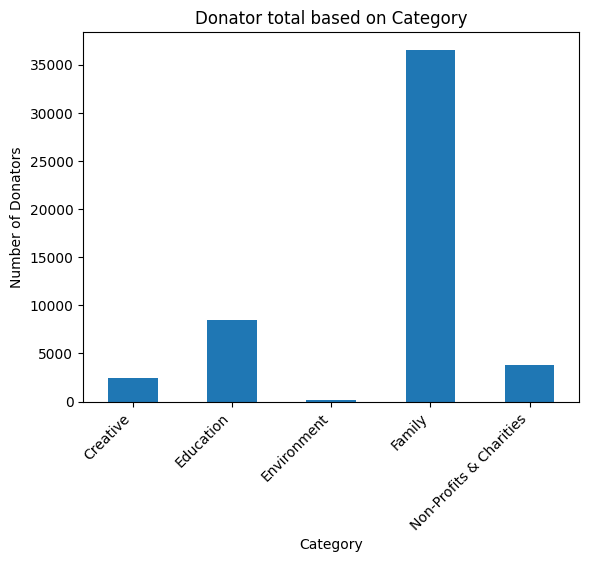

In [172]:
donator_count_by_cat.plot(kind='bar', title= 'Donator total based on Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Donators')

- How many campaigns by category are successful (100% or greater)? Please note that this may not be answered completely now, since dates are important to track here. 

In [191]:
#create a df to extract rows that are above 60% success rate:

success_df = campaigns_df[campaigns_df['Percent funded (%)'] >= 100]
success_rate_by_cat = success_df.groupby('Category')['Percent funded (%)'].count()
success_rate_by_cat


Category
Creative                   13
Education                  17
Environment                 1
Family                     30
Non-Profits & Charities     1
Name: Percent funded (%), dtype: int64

- Whats are the top 30 largest percentages of success for a campaign, despite the category? Search for outlier cases that go above 100%. This implies these campaigns are overfunded past their original funding goal.

In [192]:
success_df['Percent funded (%)'].nlargest(30)

462    932.000000
298    814.200000
537    383.400000
189    315.400000
349    311.250000
10     260.300000
439    214.200000
284    200.800000
13     186.375000
476    181.300000
246    162.800000
467    161.900000
496    155.863636
35     153.360000
433    147.285714
475    134.140000
398    127.000000
328    126.560000
447    126.285714
233    126.000000
527    122.000000
245    115.833333
227    115.500000
332    114.750000
436    114.700000
404    112.900000
535    112.900000
162    112.500000
128    112.220000
465    111.700000
Name: Percent funded (%), dtype: float64

- Which categories do these successful campaigns (outliers) belong to?

In [193]:
success_df.nlargest(30, 'Percent funded (%)')['Category'].value_counts()

Category
Family                     20
Education                   8
Environment                 1
Non-Profits & Charities     1
Name: count, dtype: int64

<Axes: title={'center': 'Percentage of Successful Campaigns by Category'}, ylabel='count'>

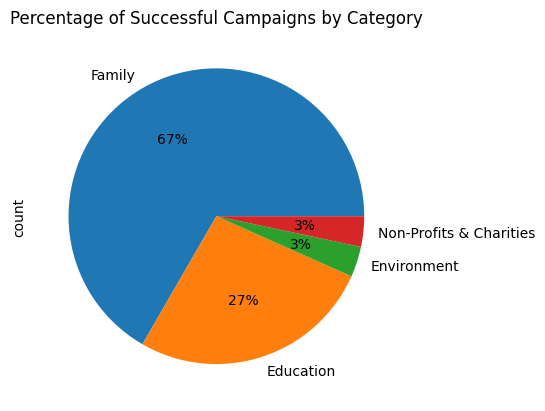

In [194]:
success_df.nlargest(30, 'Percent funded (%)')['Category'].value_counts().plot(kind='pie',autopct='%1.0f%%', title = 'Percentage of Successful Campaigns by Category')

In [195]:
campaigns_df['Campaign funded'].value_counts() #find exactly how many campaigns were successfully funded

Campaign funded
False    477
True      62
Name: count, dtype: int64

<Axes: title={'center': 'Campaigns that reached completion based on Category'}, ylabel='Campaign funded'>

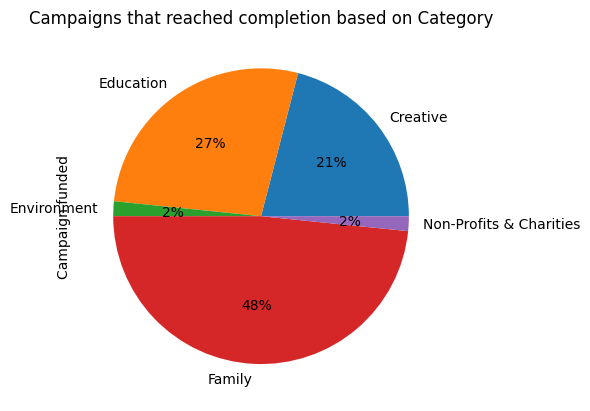

In [196]:
campaigns_df.groupby('Category')['Campaign funded'].sum().plot(kind='pie', autopct='%1.0f%%', title = 'Campaigns that reached completion based on Category')

- What is the correlation between the number of Donators and the success of a campaign?

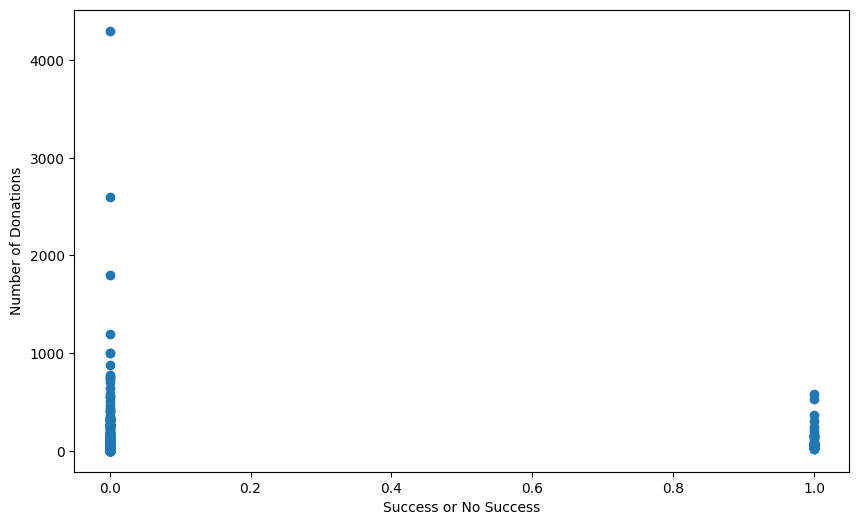

In [179]:
#To answer this question, illustrate with two scatterplots:

#scatterplot to compare two variables: campaign funded and number of donations
plt.figure(figsize=(10,6))
plt.scatter(x=campaigns_df['Campaign funded'], y=campaigns_df['Donations'])
plt.ylabel('Number of Donations')
plt.xlabel('Success or No Success')

#0 indicates goal has not been reached, while 1 indicates goal was reached
plt.show()


In [180]:
#To double check, use calculate the correlation coefficient: 
correlation = campaigns_df['Donations'].corr(campaigns_df['Campaign funded'])
print(correlation)

0.0022297467983776412


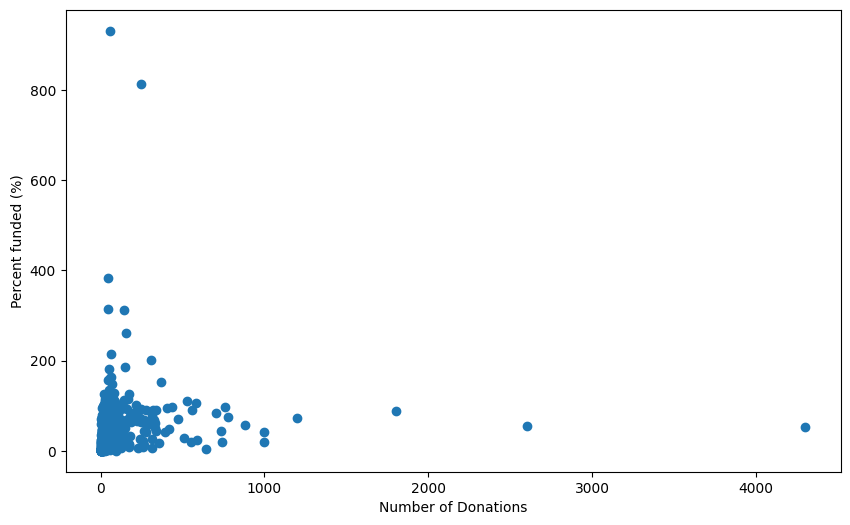

In [181]:
#scatterplot to compare two variables: percent funded and number of donations
plt.figure(figsize=(10,6))
plt.scatter(x= campaigns_df['Donations'], y=campaigns_df['Percent funded (%)'])
plt.xlabel('Number of Donations')
plt.ylabel('Percent funded (%)')
plt.show()

In [182]:
#To double check, use calculate the correlation coefficient: 
correlation = campaigns_df['Donations'].corr(campaigns_df['Percent funded (%)'])
print(correlation)

0.09079444078518464


Result being near 0 implies no correlation, confirmed.

 Key observation: The number of donors does not correlate with the success rate. This is because donors may donate a specific amount to their choosing. A single donator can donate more than 100 dollars compared to 10 donors who may pitch up to 50 dollars or less. 

- How does the goal amount affect the success rate of campaigns?

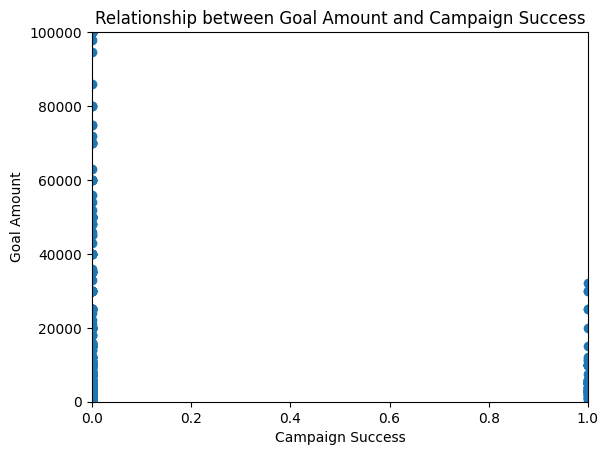

In [183]:
plt.ticklabel_format(useOffset=False)
plt.axis([0.0, 1.0, 0, 100000])

plt.scatter(x=campaigns_df['Campaign funded'],y=campaigns_df['Funding goal'])

plt.xlabel('Campaign Success')
plt.ylabel('Goal Amount')

plt.title('Relationship between Goal Amount and Campaign Success')

plt.show()

In [184]:
correlation = campaigns_df['Funding goal'].corr(campaigns_df['Campaign funded'])
print(correlation)

-0.0976302267622605


Key observation: A correlation close to 0 and negative in value implies a weak negative correlation. The larger the goal, the success rate of a campaign slightly decreases. There may be other factors involved, perhaps the time the campaign is hosted (date) or the category it belongs to. Based on previous observations, it could be that the more urgent categories such as family and education have a higher impact on donors to send money to, despite any possible goal amount the campaign host may set. 

In other words, campaigns in progress that did not reach their goals may have larger goal funding expectations than successful campaigns, however, this cannot be confirmed because of other factors including time and category.

In [185]:
#review correlations with other column variables: 
numeric_columns_campaigns_df = campaigns_df[['Money raised', 'Funding goal', 'Donations', 'Percent funded (%)', 'Campaign funded']]
numeric_columns_campaigns_df.corr()

,Money raised,Funding goal,Donations,Percent funded (%),Campaign funded
Money raised,1.000000,0.494671,0.769079,0.163967,0.031269
Funding goal,0.494671,1.000000,0.443217,-0.108462,-0.097630
Donations,0.769079,0.443217,1.000000,0.090794,0.002230
Percent funded (%),0.163967,-0.108462,0.090794,1.000000,0.577214
Campaign funded,0.031269,-0.097630,0.002230,0.577214,1.000000


- think of date-time question

KeyError: 'Column not found: Percent funded'